Презентация https://disk.yandex.ru/i/dI_NY2KGzzicxA

Дашборд: https://public.tableau.com/app/profile/polina.safonova/viz/banks_churn_16953811291880/Dashboard1

# Проект: Банки — Сегментация пользователей по потреблению

Цель: описать текущих и уходящих клиентов банка и дать рекомендации по сохранению уходящих клиентов.  

Задачи:
1. составить портреты текущих и отточных клиентов;
2. выяснить, в каких категориях клиентов происходит отток;
3. проверить гипотезы;
4. сегментировать клиентов банка и дать рекомендации по коммуникации с каждым сегментом.

## Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  

Колонки:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

## Загрузка данных

In [1]:
#загружаем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import chi2_contingency
import seaborn as sns 
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels. stats.weightstats import ztest as ztest

In [2]:
#загружаем данные
try:
    df = pd.read_csv('/datasets/my_data.csv', sep=',')
    
except:
    df =  pd.read_csv('my_data.csv', sep=',')

In [3]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


## Предобработка данных

In [5]:
# переименовываем столбцы
df.columns = ['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']

In [6]:
# задаем формат отображения чисел
pd.options.display.float_format ='{:,.1f}'.format

### Пропуски

In [7]:
# изучаем пропуски
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропуски есть в столбцах возраста и баланса, изучим их подробнее.

In [8]:
# пропуски в столбце возраста
age_null = df[df['age'].isna()]
age_null

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,"7,601,719.2",2,1,1,"408,121.2",0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.8",0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,"135,693.2",0
3091,138660,836.0,Ростов,Ж,NaN,5,"294,315.5",2,0,1,"63,310.2",1
4912,210674,834.0,Рыбинск,М,NaN,1,"238,330.5",2,0,1,"93,775.1",0
5470,218868,827.0,Рыбинск,Ж,NaN,4,"448,959.1",2,1,1,"67,835.9",0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,"137,500.8",0
7236,210135,908.0,Рыбинск,Ж,NaN,4,"1,120,340.3",3,1,1,"85,002.1",0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,"159,248.7",0
7345,184913,829.0,Ярославль,Ж,NaN,3,"188,648.8",2,0,1,"75,206.9",0


In [9]:
# какую долю датасета составляют пропуски в столбце возраста
print('Процент данных с пропусками:', (len(age_null)/len(df))*100)

Процент данных с пропусками: 0.26


Всего у нас 26 пропусков в графе возраста. Сложно предположить, с чем это может быть связано, так как для использования банковских продуктов требуется паспорт и эти данные обязательно вносятся в базу, но так как пропуски составляют всего 0,2%, мы можем их удалить без влияния на дальнейший результат. 

In [10]:
# удаляем
df.dropna(subset=['age'], inplace=True)

In [11]:
# смотрим пропуски в балансе у уходящих и активных клиентов
balance_null = df[df['balance'].isna()]
balance_null.groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,2266
1,13


In [12]:
# смотрим пропуски в балансе у активных и неактивных клиентов
balance_null.groupby('last_activity').agg({'user_id':'count'})

,user_id
last_activity,
0,1028
1,1251


In [13]:
# есть ли клиенты с нулевым балансом
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,"64,548.3",0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,"23,876.5",0


In [14]:
# смотрим пропуски в балансе у клиентов с кредитной картой и без нее
balance_null.groupby('credit_card').agg({'user_id':'count'})

,user_id
credit_card,
0,421
1,1858


In [15]:
# может ли баланс быть отрицательным
df['balance'].min()

0.0

In [16]:
# какую долю датасета составляют пропуски в столбце баланса
print('Процент данных с пропусками:', (len(balance_null)/len(df))*100)

Процент данных с пропусками: 22.849408462001204


Пропуски в балансе есть всего у 13 уходящих клиентов, значит, они не связаны с этим параметром. Мы могли бы предположить, что пропуск означает отсутствие денег на счете, но в датасете есть клиенты с указанным нулевым балансом. Также у активных и неактивных клиентов примерно одинаковое количество пропусков, вряд ли мы можем объяснить пропуски неактивностью. Большая часть пропусков находится у клиентов, у которых есть кредитная карта. Возможно, у них есть задолженность перед банком, но в системе не отображаются отрицательные значения.
По имеющимся данным мы не можем установить точную причину пропусков и, соответственно, заполнить их. Так как данные с пропусками составляют пятую часть датасета, удалять их нельзя, поэтому оставляем как есть.

In [17]:
# смотрим пропуски в балансе в разрезе по городам
balance_null.groupby('city').agg({'user_id':'count'})

,user_id
city,
Ростов,235
Рыбинск,586
Ярославль,1458


In [18]:
# смотрим пропуски в балансе в разрезе по полу
balance_null.groupby('gender').agg({'user_id':'count'})

,user_id
gender,
Ж,1007
М,1272


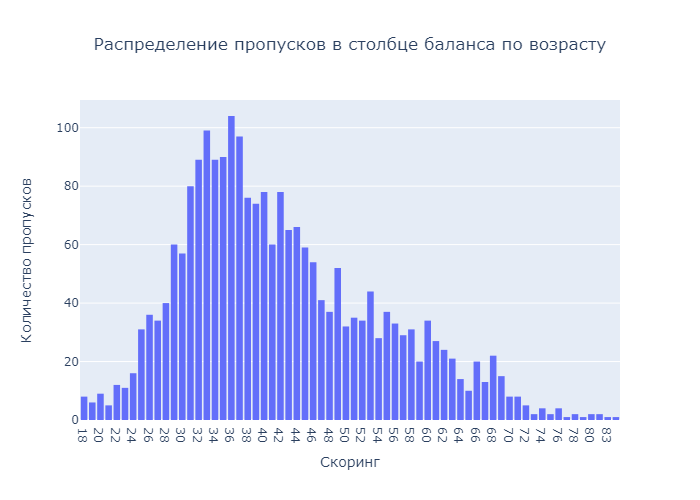

In [19]:
# смотрим пропуски в балансе по возрасту
balance_null_age = balance_null.groupby('age').agg({'user_id':'count'}).reset_index() 
fig = px.histogram(balance_null_age, x='age', y='user_id',  barmode='group',
                   title='Распределение пропусков в столбце баланса по возрасту').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Скоринг', yaxis_title='Количество пропусков')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

По параметрам города, пола и возраста не удалось выявить каких-либо закономерностей в пропусках.

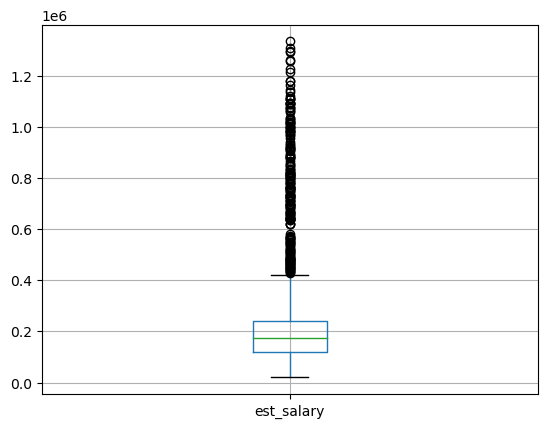

count       2,279.0
mean      226,345.4
std       199,825.6
min        20,274.0
25%       120,217.4
50%       174,347.9
75%       240,372.8
max     1,333,687.4
Name: est_salary, dtype: float64

In [20]:
# смотрим пропуски в балансе по доходу
balance_null.boxplot(column=['est_salary'])
plt.show()
balance_null['est_salary'].describe()

In [21]:
# смотрим пропуски в балансе по баллам собственности
balance_null.groupby('equity').agg({'user_id':'count'}).reset_index() 

,equity,user_id
0,0,2164
1,1,114
2,3,1


In [22]:
# смотрим пропуски в балансе по количеству продуктов
balance_null.groupby('products').agg({'user_id':'count'}).reset_index() 

,products,user_id
0,0,1
1,1,1934
2,2,315
3,3,29


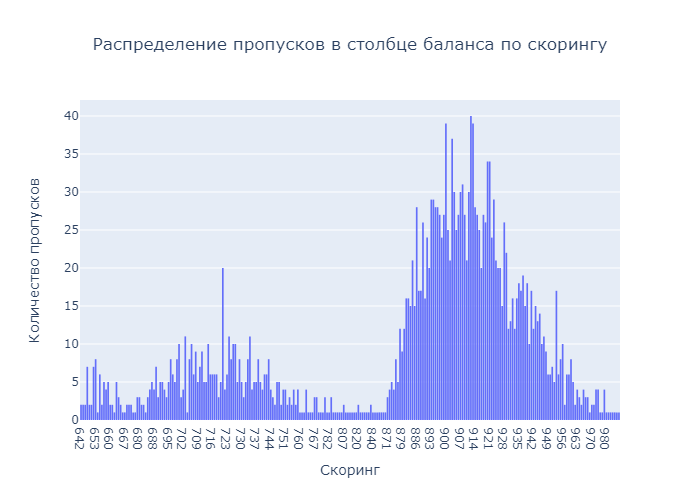

In [23]:
# смотрим пропуски в балансе по скоригу
balance_null_score = balance_null.groupby('score').agg({'user_id':'count'}).reset_index() 
fig = px.histogram(balance_null_score, x='score', y='user_id',  barmode='group',
                   title='Распределение пропусков в столбце баланса по скорингу').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Скоринг', yaxis_title='Количество пропусков')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

Мы обнаружили, что пропуски в балансе в основном встречаются у клиентов с 0 баллами собственности, одним продуктом и высоким скорингом (>875). Скорее всего, это пользователи моментальных кредитных карт, для которых не нужны справки (отсюда 0 баллов собственности), а сами пропуски - это кредитный баланс, который не отображается так, как дебетовый.

### Дубликаты

In [24]:
df.duplicated().sum()

0

Полных дубликатов нет, проверим на неявные дубликаты.

In [25]:
df['user_id'].duplicated().sum()

50

В датасете есть 50 дубликатов по уникальному id клиента, изучим их подробнее.

In [26]:
# выделяем дубликаты в отдельную таблицу и выводим id
duplicated_id = df[df['user_id'].duplicated()]
duplicated_id['user_id'].unique()

array([190253, 210662, 131419, 220816, 208081, 170312, 185748, 211130,
       217643, 226719, 197364, 155765, 126368, 143592, 141265, 208815,
       152479, 217619, 208738, 120258, 188957, 172142, 163207, 164676,
       140377, 117943, 116540, 210792, 191520, 149365, 148826, 227795,
       210627, 123461, 181526, 162053, 199312, 183510, 200863, 150667,
       155872, 217826, 129785, 160075, 171751, 195884, 124450, 168998,
       217412, 175730], dtype=int64)

In [27]:
# проверим несколько id, чтобы посмотреть, есть ли закономерности
df.query('user_id == 190253')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823.0,Рыбинск,М,37.0,4,"373,348.4",2,0,1,"131,947.9",1
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,"177,700.8",0


In [28]:
df.query('user_id == 210662')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
869,210662,962.0,Ярославль,Ж,54.0,5,"5,069,231.4",1,1,1,"955,144.8",1
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,"90,916.0",0


In [29]:
df.query('user_id == 131419')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
904,131419,934.0,Ярославль,М,35.0,5,"2,348,336.0",2,0,0,"217,105.1",1
2138,131419,739.0,Рыбинск,Ж,37.0,3,"1,307,941.6",3,0,0,"103,867.5",0


Мы видим, что дубликаты идут попарно: это разные люди, но один из клиентов ушел, а другой остался. Видимо, после ухода клиента его id переназначается другому. Оставим только текущих клиентов.

In [30]:
df.drop_duplicates(subset=['user_id'], keep='last', inplace=True)

In [31]:
# проверяем после удаления
df['user_id'].duplicated().sum()

0

### Типы данных

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9924 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9924 non-null   int64  
 1   score          9924 non-null   float64
 2   city           9924 non-null   object 
 3   gender         9924 non-null   object 
 4   age            9924 non-null   float64
 5   equity         9924 non-null   int64  
 6   balance        7645 non-null   float64
 7   products       9924 non-null   int64  
 8   credit_card    9924 non-null   int64  
 9   last_activity  9924 non-null   int64  
 10  est_salary     9924 non-null   float64
 11  churn          9924 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1007.9+ KB


Переведем скоринг и возраст в целые числа, а наличие кредитной карты, активность и отток в булевые значения.

In [33]:
df['score']=df['score'].astype('int')
df['age']=df['age'].astype('int')
df['credit_card']=df['credit_card'].astype('bool')
df['last_activity']=df['last_activity'].astype('bool')
df['churn']=df['churn'].astype('bool')
# проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9924 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9924 non-null   int64  
 1   score          9924 non-null   int32  
 2   city           9924 non-null   object 
 3   gender         9924 non-null   object 
 4   age            9924 non-null   int32  
 5   equity         9924 non-null   int64  
 6   balance        7645 non-null   float64
 7   products       9924 non-null   int64  
 8   credit_card    9924 non-null   bool   
 9   last_activity  9924 non-null   bool   
 10  est_salary     9924 non-null   float64
 11  churn          9924 non-null   bool   
dtypes: bool(3), float64(2), int32(2), int64(3), object(2)
memory usage: 726.9+ KB


### Аномальные значения

In [34]:
#количество продуктов
df.groupby('products').agg({'user_id':'count'})

,user_id
products,
0,1
1,3318
2,5094
3,1032
4,461
5,18


In [35]:
df.query('products==0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,False,False,"25,064.0",True


В датасет попал один ушедший клиент с 0 продуктов, убираем его.

In [36]:
df=df.query('products>0')

#### Баланс

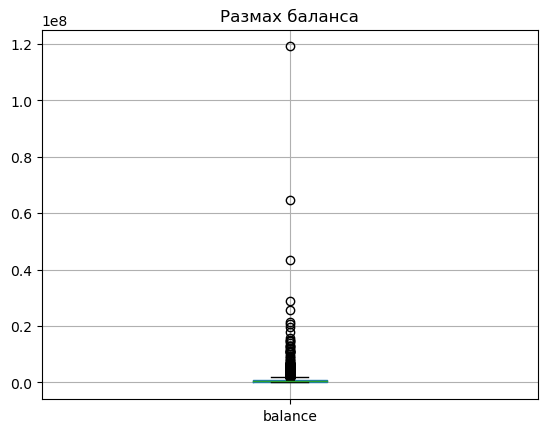

In [37]:
df.boxplot(column=['balance'])
plt.title('Размах баланса')
plt.show();

На графике много выбросов, ограничим значения.

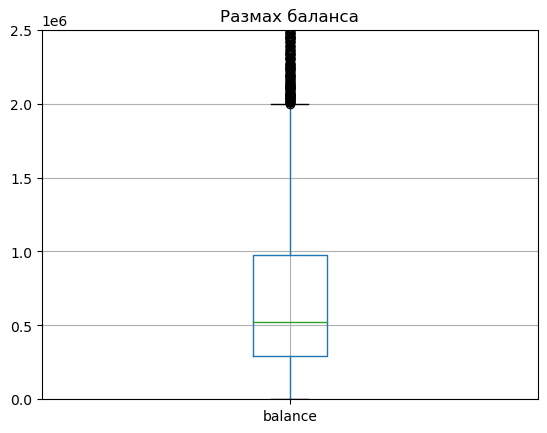

In [38]:
df.boxplot(column=['balance'])
plt.title('Размах баланса')
plt.ylim(0,2500000)
plt.show();

In [39]:
# задаем формат отображения чисел
pd.options.display.float_format ='{:,.1f}'.format
# смотрим  описательную статистику для баланса
df['balance'].describe()

count         7,645.0
mean        823,791.6
std       1,978,961.6
min               0.0
25%         295,005.3
50%         521,573.4
75%         975,655.0
max     119,113,552.0
Name: balance, dtype: float64

У 75% клиентов баланс составляет менее 1 млн рублей, у 95% - менее 2 млн. рублей. Данные от 2 млн. руб. считаются выбросами, но часть клиентов в банках составляют обеспеченные люди, которые приносят большой доход, и было бы нецелесообразно исключать их из анализа. Далее мы разделим клиентов на две категории: mass и premium. Разделение зависит от количества средств на счете и ежемесячного дохода и различается в разных банках. Для нашего исследования мы выделим в категорию premium клиентов, чей баланс и доход выше 4 квантиля (т.е. выше верхнего значения баланса и дохода 95% всех клиентов).

#### Доход

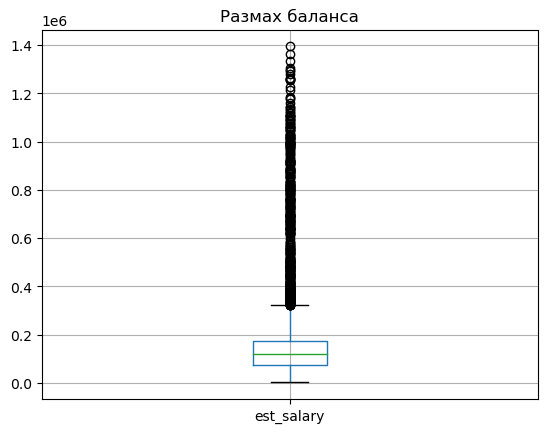

In [40]:
df.boxplot(column=['est_salary'])
plt.title('Размах баланса')
plt.show();

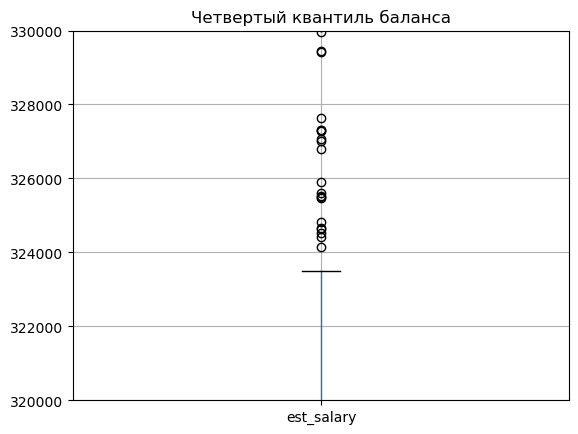

In [41]:
# посмотрим на верхний "ус"
df.boxplot(column=['est_salary'], grid=True)
plt.title('Четвертый квантиль баланса')
plt.ylim(320000,330000)
plt.show();

In [42]:
df['est_salary'].describe()

count       9,923.0
mean      147,613.3
std       139,048.5
min         2,546.3
25%        75,082.8
50%       119,521.5
75%       174,468.0
max     1,395,064.4
Name: est_salary, dtype: float64

Доход 95% клиентов не превышает 323 тыс. руб., они попадут а категорию mass, остальные - в premium.

### Разделение клиентов по категориям mass и premium

В категорию mass определим клиентов с балансом менее 2 млн. руб. и доходом менее 323 тыс. руб.   
В категорию premium попадут клиенты с балансом более 2 млн. руб. вне зависимости от дохода, а также клиенты с доходом более 323 тыс. руб. вне зависимости от баланса.  
Клиентов с пропусками в графе баланса распределяем по категориям в зависимости от дохода.

Мы можем сделать это двумя способами: добавить новый столбец с категорией в изначальный датасет, а также создать два новых датасета с клиентами одной категории. Для удобства построения графиков сделаем и так, и так.

In [43]:
# напишем функцию для распределения клиентов по категориям
def f(row):
    if row['balance'] <  2000000 and row['est_salary'] < 323000:
        val = 'mass'
    elif row['balance'] >= 2000000 or row['est_salary'] >= 323000:
        val = 'premium'
    else :
        val = 'mass'
    return val

# создаем новую колонку с категорией на основе функции
df['client_category'] = df.apply (f, axis=1)

In [44]:
#создаем отдельные датасеты 
mass_clients = df.query('client_category == "mass"')
premium_clients = df.query('client_category == "premium"')

Предобработка данных проведена, приступаем к анализу.

## Исследовательский анализ данных

In [45]:
#Сколько всего пользователей?
print('Общее количество клиентов:', len(df))
print('Количество клиентов категории mass:', len(mass_clients))
print('Процент клиентов категории mass:', round(len(mass_clients)/len(df)*100))
print('Количество клиентов категории premium:',len(premium_clients))
print('Процент клиентов категории premium:', round(len(premium_clients)/len(df)*100))

Общее количество клиентов: 9923
Количество клиентов категории mass: 9143
Процент клиентов категории mass: 92
Количество клиентов категории premium: 780
Процент клиентов категории premium: 8


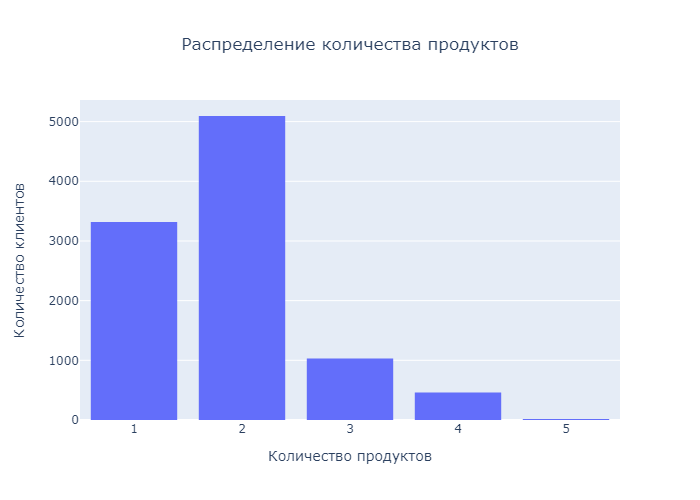

In [47]:
#Сколько в среднем продуктов приходится на пользователя?
av_products = df.groupby(['client_category', 'products']).agg({'user_id':'count'}).reset_index() 

fig = px.histogram(av_products, x='products', y='user_id',  barmode='group',
                   color_discrete_map ={'mass':'#E6B654', 'premium':'#5B00A1'},
        
                   title='Распределение количества продуктов ').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='Количество клиентов')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

В основном клиенты пользуются двумя продуктами банка. Далее мы посмотрим, меняется ли количество продуктов в зависимости от категории клиентов.

### Клиенты по категориям mass и premium

#### Город

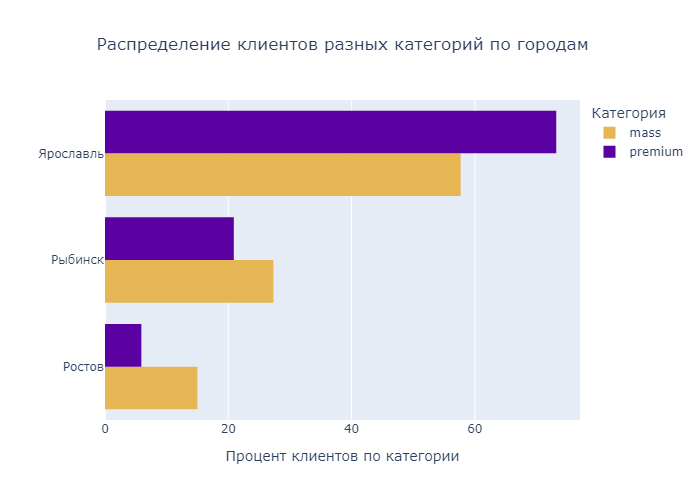

In [48]:
# составляем таблицу для графика
cat_city = df.groupby(['client_category', 'city']).agg({'user_id':'count'}).reset_index() 

# визуализируем
fig = px.histogram(cat_city, y='city', x='user_id', color='client_category', barmode='group',
                   color_discrete_map ={'mass':'#E6B654', 'premium':'#5B00A1'},
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Распределение клиентов разных категорий по городам').update_xaxes(categoryorder='total descending')

fig.update_layout(xaxis_title='Процент клиентов по категории', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.show(renderer='png')

Около 73% премиум-клиентов находятся в Ярославле, почти 21% - в Рыбинске, и лишь около 6% в Ростове. Для категории массовых клиентов распределение следующее: около 58% в в Ярославле, 27% - в Рыбинске, 15% - в Ростове.

#### Возраст

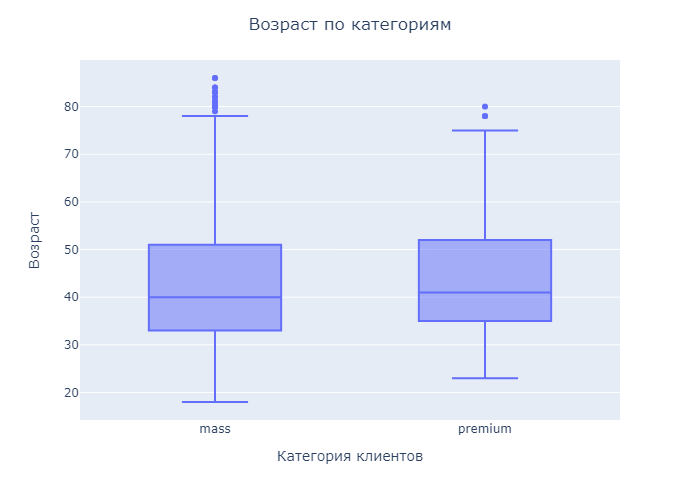

In [49]:
# строим боксплоты
fig = px.box(df, x="client_category", y="age")
fig.update_layout(xaxis_title='Категория клиентов', yaxis_title='Возраст')
fig.update_layout(title='Возраст по категориям') #меняем заголовок 
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.show(renderer='png')

In [50]:
print('Средний возраст массовых клиентов:', round(mass_clients['age'].mean()))
print('Средний возраст премиум-клиентов:',round(premium_clients['age'].mean()))

Средний возраст массовых клиентов: 43
Средний возраст премиум-клиентов: 44


Медианный возраст по категориям почти одинаков: 40 лет в массовом сегменте, 41 год - в премиум. Также и со средним возрастом: 43 в массовом, 44 в премиум.
Зато отличается минимальный и максимальный возраст: в массовом есть клиенты от 18 до 86 лет (95% клиентов - до 78), в премиум - от 23 до 80 (95% клиентов - до 75). 

#### Пол

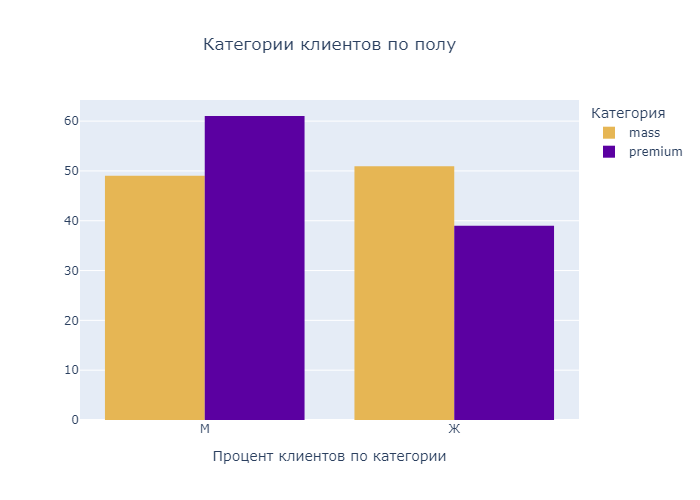

In [51]:
# составляем таблицу для графика
cat_gender = df.groupby(['client_category', 'gender']).agg({'user_id':'count'}).reset_index() 

# визуализируем
fig = px.histogram(cat_gender, x='gender', y='user_id', color='client_category', barmode='group',
                   color_discrete_map ={'mass':'#E6B654', 'premium':'#5B00A1'},
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Категории клиентов по полу').update_xaxes(categoryorder='total descending')

fig.update_layout(xaxis_title='Процент клиентов по категории', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.show(renderer='png')

Массовые клиенты распределяются по полу почти поровну, но в премиум клиентов-мужчин больше, чем женщин: 61% против 39%.

#### Скоринг

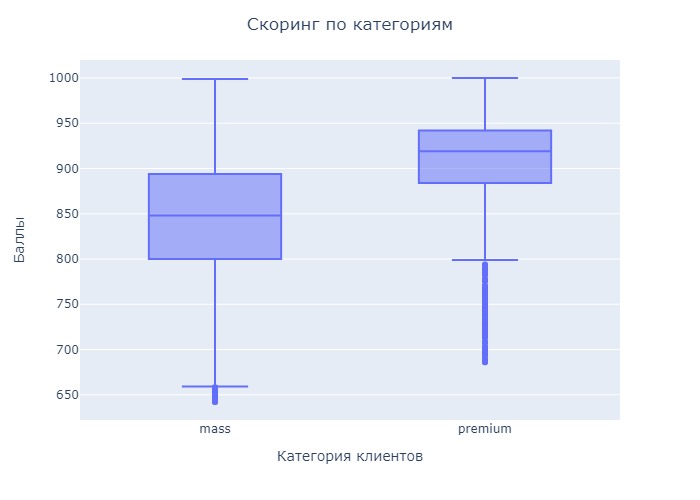

In [52]:
fig = px.box(df, x="client_category", y="score")
fig.update_layout(xaxis_title='Категория клиентов', yaxis_title='Баллы')
fig.update_layout(title='Скоринг по категориям') #меняем заголовок 
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.show(renderer='png')

In [53]:
print('Средний скоринг массовых клиентов:', round(mass_clients['score'].mean()))
print('Средний скоринг премиум-клиентов:',round(premium_clients['score'].mean()))

Средний скоринг массовых клиентов: 845
Средний скоринг премиум-клиентов: 895


Скоринг заметно различается по категориям: в массовой медианный балл - 848 (и почти такой же средний - 845), а в премиум - 919 (а средний ниже - 895). При этом 95% премиум-клиентов имеют выше 799 баллов, в единичных случаях он ниже (минимальный балл - 686). У массовых клиентов 95% имеют больше 659 баллов (а минимальный балл у клиентов ниже этого порога - 642).

#### Баллы собственности

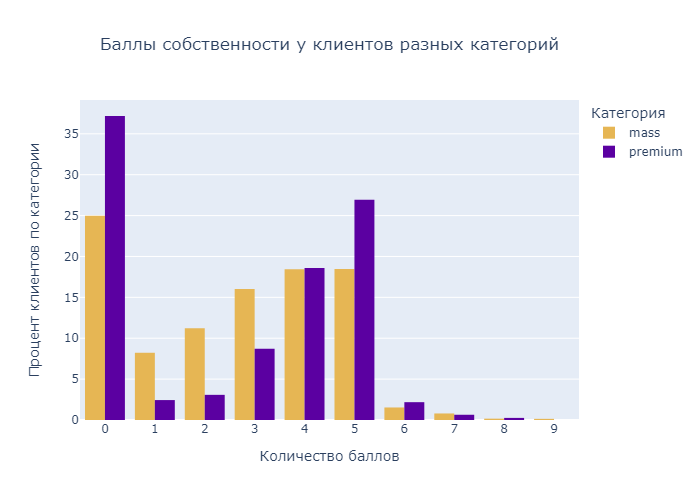

In [54]:
# составляем таблицу для графика
cat_equity = df.groupby(['client_category', 'equity']).agg({'user_id':'count'}).reset_index() 

# визуализируем
fig = px.histogram(cat_equity, x='equity', y='user_id', color='client_category', barmode='group',
                   color_discrete_map ={'mass':'#E6B654', 'premium':'#5B00A1'},
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Баллы собственности у клиентов разных категорий').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Количество баллов', yaxis_title='Процент клиентов по категории')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

Массовые клиенты: большая часть (25%) имеют 0 баллов собственности, далее по убыванию: 4 и 5 баллов (по 18% каждый), 3 балла (16%), 2 балла (11%), 1 балл (8%), 6 баллов (1,5%). Незначительная доля клиентов имеет 7 и более баллов.  
Премиум-клиенты: также большая часть (37%) - 0 баллов собственности, далее по убыванию: 5 баллов (27%), 4 балла (18,5%), 3 балла (около 9%), 2 балла (3%), 1 балл (2%), 6 баллов (2%). И так же, как у массовых, незначительная доля клиентов имеет 7 и более баллов.

Рассмотрим подробнее клиентов с 0 баллов собственности.

In [55]:
# выделяем их в отдельный датасет
zero_equity = df.query('equity==0')

In [56]:
# по категории
zero_equity.groupby(['client_category']).agg({'user_id':'count'}).reset_index()

,client_category,user_id
0,mass,2283
1,premium,290


In [57]:
# количество продуктов
zero_equity.groupby(['products']).agg({'user_id':'count'}).reset_index()

,products,user_id
0,1,1959
1,2,546
2,3,58
3,4,10


In [58]:
# есть ли кредитная карта
zero_equity.groupby(['credit_card']).agg({'user_id':'count'}).reset_index()

,credit_card,user_id
0,False,525
1,True,2048


In [59]:
# смотрим на доход
zero_equity['est_salary'].describe()

count       2,573.0
mean      208,254.9
std       191,272.7
min         7,054.8
25%       106,937.0
50%       161,346.1
75%       227,528.1
max     1,333,687.4
Name: est_salary, dtype: float64

In [60]:
# смотрим на баланс
zero_equity['balance'].describe()

count         409.0
mean      156,923.0
std       129,415.6
min             0.0
25%        62,968.2
50%       136,169.7
75%       228,760.2
max     1,276,847.4
Name: balance, dtype: float64

In [61]:
# смотрим на клиентов с пропусками в балансе и без собственности
balance_null = df[df['balance'].isna()]
balance_null.groupby(['equity']).agg({'user_id':'count'})

,user_id
equity,
0,2164
1,114


Среди клиентов с 0 баллов собственности у 2,573 указан доход, а вот баланс указан только у 409 клиентов. Возможно, это связано. Учитывая, что у большинства zero_equity клиентов есть кредитная карта, мы можем предположить, что клиенты с 0 баллов собственности и пропусками в балансе - это люди, получившие моментальные кредитные карты, для которых не нужны справки, поэтому данных в базе просто нет.

Построим распределение для клиентов с указанным балансом и наличием какой-либо собственности.

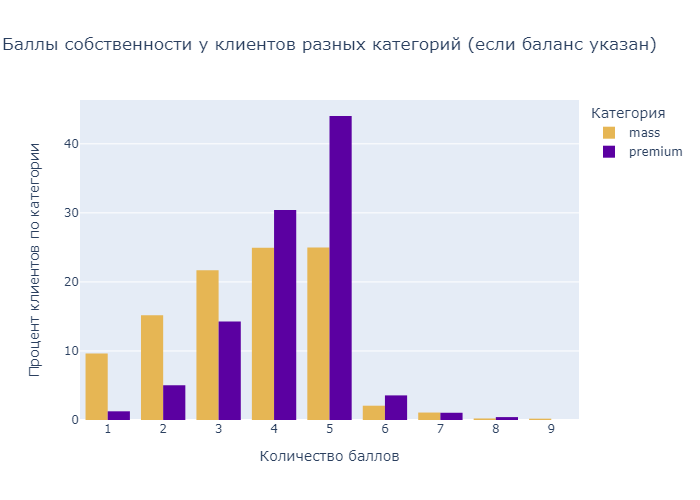

In [62]:
new_equity = df.query('balance>0 and equity>0')
new_equity_plot = new_equity.groupby(['client_category', 'equity']).agg({'user_id':'count'}).reset_index() 
fig = px.histogram(new_equity_plot, x='equity', y='user_id', color='client_category', barmode='group',
                   color_discrete_map ={'mass':'#E6B654', 'premium':'#5B00A1'},
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Баллы собственности у клиентов разных категорий (если баланс указан)').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Количество баллов', yaxis_title='Процент клиентов по категории')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

Новый график выглядит более реалистично: у премиум-клиентов пик приходится на 5 баллов (44%), а у массовых примерно поровну клиентов имеют 4 или 5 баллов (около 25% каждый). При этом доля тех, у кого всего 1 балл, выше среди массовых клиентов, а тех, у кого 6 баллов, - среди премиум. С другой стороны, недвижимость может быть записана на родственников, особенно у премиум-клиентов, поэтому без дополнительной информации сложно точно установить причины такого большого количества людей, не обладающих собственностью.

In [63]:
#средний и медианный балл среди всех клиентов
print('Средний балл собственности массовых клиентов:', round(mass_clients['equity'].mean()))
print('Медианный балл собственности массовых клиентов:', round(mass_clients['equity'].median()))
print('Средний балл собственности премиум-клиентов:',round(premium_clients['equity'].mean()))
print('Медианный балл собственности массовых клиентов:', round(premium_clients['equity'].median()))

Средний балл собственности массовых клиентов: 3
Медианный балл собственности массовых клиентов: 3
Средний балл собственности премиум-клиентов: 3
Медианный балл собственности массовых клиентов: 3


In [64]:
#средний и медианный балл среди клиентов с указанным  балансом и наличием собственности
new_equity_mass=new_equity.query('client_category=="mass" ')
new_equity_premium=new_equity.query('client_category=="premium" ')

print('Средний балл собственности массовых клиентов:', round(new_equity_mass['equity'].mean()))
print('Медианный балл собственности массовых клиентов:', round(new_equity_mass['equity'].median()))
print('Средний балл собственности премиум-клиентов:',round(new_equity_premium['equity'].mean()))
print('Медианный балл собственности массовых клиентов:', round(new_equity_premium['equity'].median()))

Средний балл собственности массовых клиентов: 4
Медианный балл собственности массовых клиентов: 4
Средний балл собственности премиум-клиентов: 4
Медианный балл собственности массовых клиентов: 4


В среднем у клиентов обеих категорий по 4 балла собственности, если учитывать только клиентов с указанным  балансом и наличием собственности, либо 3 балла, если учитывать всех.

#### Количество продуктов

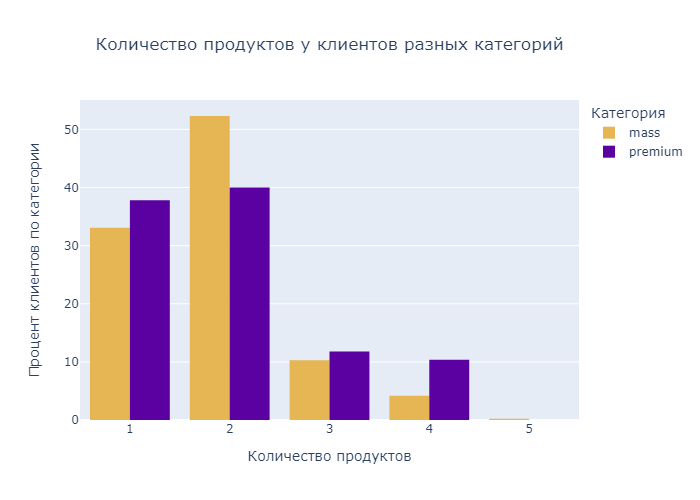

In [65]:
# составляем таблицу для графика
cat_products = df.groupby(['client_category', 'products']).agg({'user_id':'count'}).reset_index() 

# визуализируем
fig = px.histogram(cat_products, x='products', y='user_id', color='client_category', barmode='group',
                   color_discrete_map ={'mass':'#E6B654', 'premium':'#5B00A1'},
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Количество продуктов у клиентов разных категорий').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='Процент клиентов по категории')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Категория')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

In [66]:
print('Среднее количество продуктов у массовых клиентов:', round(mass_clients['products'].mean()))
print('Медианное количество продуктов у массовых клиентов:', round(mass_clients['products'].median()))
print('Среднее количество продуктов у премиум-клиентов:',round(premium_clients['products'].mean()))
print('Медианное количество продуктов у массовых клиентов:', round(premium_clients['products'].median()))

Среднее количество продуктов у массовых клиентов: 2
Медианное количество продуктов у массовых клиентов: 2
Среднее количество продуктов у премиум-клиентов: 2
Медианное количество продуктов у массовых клиентов: 2


Более половины массовых клиентов (52%) пользуются двумя продуктами, еще 33% - одним. У категории премиум почти одинаковое количество клиентов, использующих один или два продукта (около 38% и 40% соответственно). Тремя продуктами пользуются почти 12% премиум-клиентов и 10% массовых. Однако доля клиентов, пользующаяся 4 продуктами, в категории премиум выше, чем в массовой: 10% против 4%. Пять продуктов использует совсем малая доля массовых клиентов (0,1%) и вообще не использует премиум. Среднее и медианное количество используемых продуктов в обеих категориях - 2.

#### Наличие кредитной карты

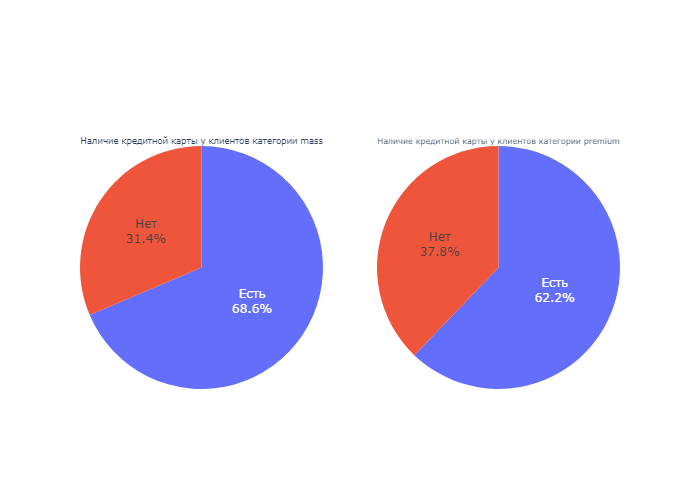

In [67]:
# составляем таблицу для графика
plot = mass_clients.groupby(['credit_card']).agg({'user_id':'count'}).reset_index()
plot_two = premium_clients.groupby(['credit_card']).agg({'user_id':'count'}).reset_index()
# визуализируем
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
labels=['Нет', 'Есть']
fig.add_trace(go.Pie(values=plot['user_id'], labels=labels,
             title='Наличие кредитной карты у клиентов категории mass'), 1, 1)
fig.add_trace(go.Pie(values=plot_two['user_id'], labels=labels,
             title='Наличие кредитной карты у клиентов категории premium'), 1,2)
fig.update_layout(title_xref="paper", title_x=1) #положение заголовка
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update(layout_showlegend=False)
fig.show(renderer='png')

Разница между клиентами разных категорий не очень большая: кредитная карта есть у 68,6% массовых клиентов и у 62,2% премиум-клиентов.

#### Активность

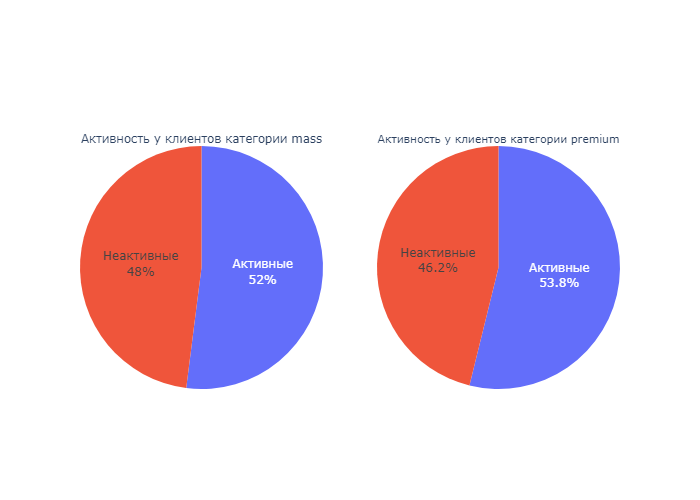

In [68]:
# составляем таблицу для графика
act_plot = mass_clients.groupby(['last_activity']).agg({'user_id':'count'}).reset_index()
act_plot_two = premium_clients.groupby(['last_activity']).agg({'user_id':'count'}).reset_index()
# визуализируем
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
labels=['Неактивные', 'Активные']
fig.add_trace(go.Pie(values=act_plot['user_id'], labels=labels,
             title='Активность у клиентов категории mass'), 1, 1)
fig.add_trace(go.Pie(values=act_plot_two['user_id'], labels=labels,
             title='Активность у клиентов категории premium'), 1,2)
fig.update_layout(title_xref="paper", title_x=1) #положение заголовка
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update(layout_showlegend=False)
fig.show(renderer='png')

Чуть больше половины клиентов каждой категории не проявляли активность в последнее время.

#### Баланс

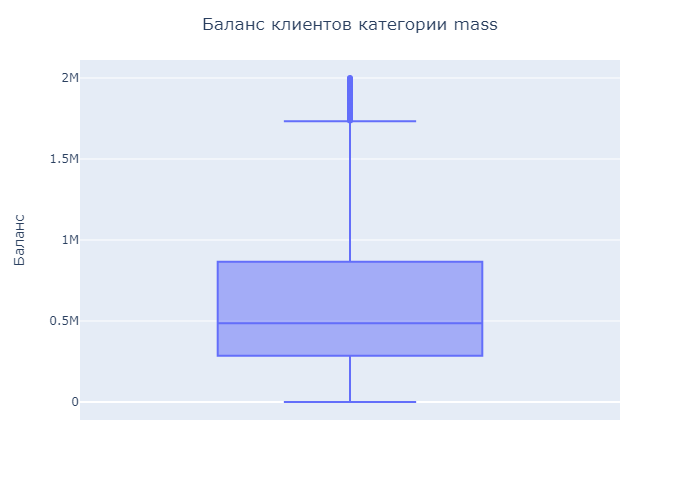

In [69]:
# у клиентов категории mass
fig = px.box(mass_clients, y="balance")
fig.update_layout(xaxis_title='', yaxis_title='Баланс')
fig.update_layout(title='Баланс клиентов категории mass') #меняем заголовок 
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.show(renderer='png')

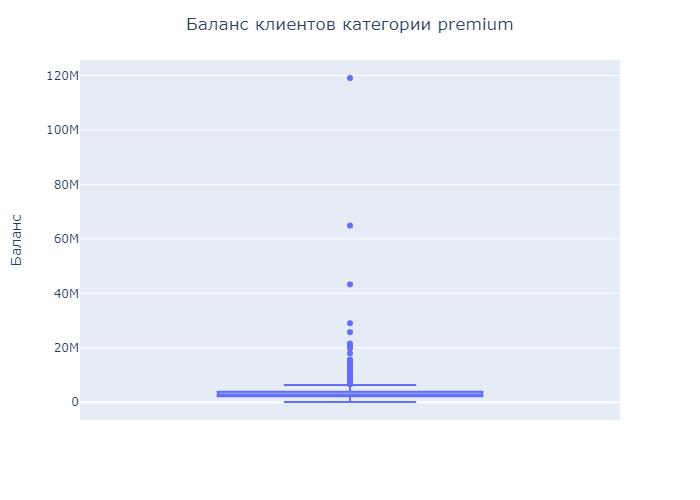

In [70]:
# у клиентов категории premium
fig = px.box(premium_clients, y="balance")
fig.update_layout(xaxis_title='', yaxis_title='Баланс')
fig.update_layout(title='Баланс клиентов категории premium') #меняем заголовок 
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.show(renderer='png')

Нам мешают выбросы, ограничим ось по верхнему порогу.

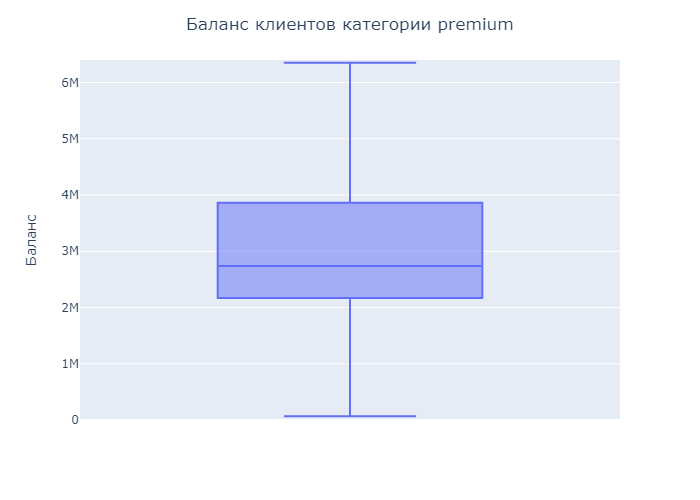

In [71]:
# у клиентов категории premium без выбросов
fig = px.box(premium_clients, y="balance")
fig.update_layout(xaxis_title='', yaxis_title='Баланс')
fig.update_layout(title='Баланс клиентов категории premium') #меняем заголовок 
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_yaxes(range=[0,6400000]) #ограничиваем ось
fig.show(renderer='png')

In [72]:
print('Количество клиентов с балансом более 6,4 млн. руб.:', len(premium_clients.query('balance > 6400000')))

Количество клиентов с балансом более 6,4 млн. руб.: 42


In [73]:
print('Средний баланс массовых клиентов:', round(mass_clients['balance'].mean()))
print('Средний баланс премиум-клиентов:',round(premium_clients['balance'].mean()))

Средний баланс массовых клиентов: 610203
Средний баланс премиум-клиентов: 4004972


Массовые клиенты: медианный баланс составляет 486 тыс. руб., средний - 610 тыс., минимальный - 0. Максимальный баланс мы установили ранее (2 млн.). У 75% клиентов баланс не превышает 866 тыс. руб.  
Премиум-клиенты: медианный баланс - 2,7 млн. руб., средний - 4 млн., минимальный - 66 тыс. У 75% клиентов баланс не превышает 3,9 млн. руб. 95% премиум-клиентов хранят на счете до 6,4 млн., но есть 42 человека с более высоким балансом. Самый большой счет в банке составляет 119 млн. руб.

#### Доход

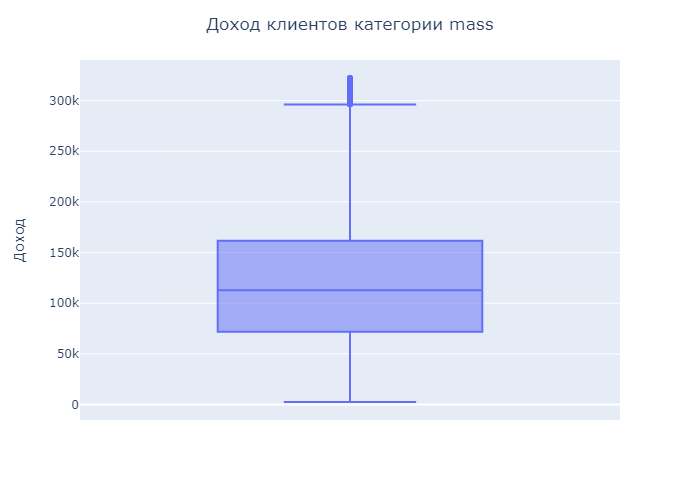

In [74]:
# у клиентов категории mass
fig = px.box(mass_clients, y='est_salary')
fig.update_layout(xaxis_title='', yaxis_title='Доход')
fig.update_layout(title='Доход клиентов категории mass') #меняем заголовок 
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.show(renderer='png')

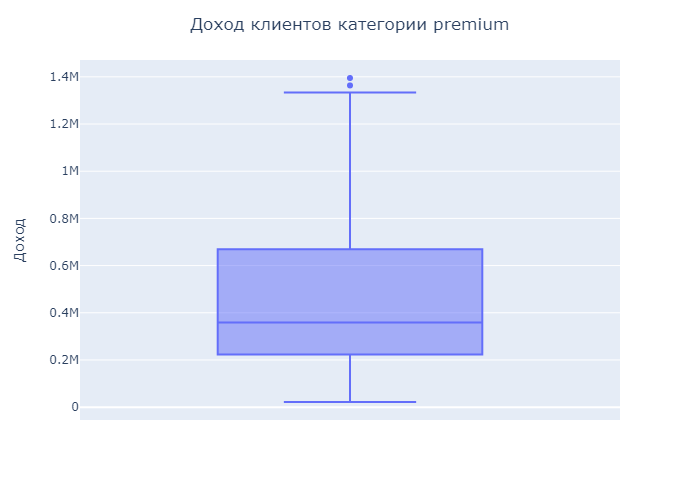

In [75]:
# у клиентов категории premium
fig = px.box(premium_clients, y='est_salary')
fig.update_layout(xaxis_title='', yaxis_title='Доход')
fig.update_layout(title='Доход клиентов категории premium') #меняем заголовок 
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.show(renderer='png')

In [76]:
print('Средний доход массовых клиентов:', round(mass_clients['est_salary'].mean()))
print('Средний доход премиум-клиентов:',round(premium_clients['est_salary'].mean()))

Средний доход массовых клиентов: 120844
Средний доход премиум-клиентов: 461397


Массовые клиенты: медианный доход - 100 тыс. руб., а средний - 120 тыс. Минимальный - 2,5 тыс., а максимальный - около 250 тыс.  
Премиум-клиенты: медианный доход - 359 тыс. руб., а средний - 461 тыс. Минимальный - около 28 тыс. (они попали в эту категорию благодаря высокому балансу на счете), а максимальный - около 1,3 млн.

#### Сравнение категорий

Массовые и премиум клиенты похожи в следующих параметрах:
- медианный возраст 40-41 год, средний 43-44;  
- большая часть имеет кредитную карту (у 68,6% массовых клиентов и у 62,2% премиум);  
- чуть больше половины проявляли активность в последнее время (52% массовых, 53,8% премиум);  
- одинаковое медианное и среднее количество баллов собственности: 4, если учитывать только клиентов с указанным балансом и наличием собственности, либо 3 балла, если учитывать всех;  
- одинаковое медианное и среднее количество используемых продуктов в обеих категориях: 2.  
    
Различия есть в распределении по городам и полу. Абсолютное большинство премиум-клиентов находятся в Ярославле (73%), в Рыбинске - почти 21%, и только 6% в Ростове. Больше половины (58%) массовых клиентов так же в Ярославле, но доли в других городах выше: 27% - в Рыбинске, 15% - в Ростове. Среди премиум-клиентов гораздо больше мужчин (61%), среди массовых мужчин и женщин поровну.  

У премиум-клиентов более высокие баллы скоринга: 919 - медианный, 895 - средний. У массовых клиентов медианный балл - 848, средний - 845.  

Медианный доход массовых клиентов - 100 тыс. руб., средний - 120 тыс. У премиум -  медианный доход - 359 тыс. руб., средний - 461 тыс. 

Медианный баланс массовых клиентов составляет 486 тыс. руб., средний - 610 тыс.  У премиум - медианный баланс - 2,7 млн. руб., средний - 4 млн.

### Отточные клиенты

Посмотрим, как различаются характеристики текущих и отточных клиентов.

In [77]:
# считаем процент оттока
churn_percent=round(len(df.query('churn==True'))/len(df)*100, 2)
churn_percent_mass=round(len(mass_clients.query('churn==True'))/len(mass_clients)*100, 2)
churn_percent_premium=round(len(premium_clients.query('churn==True'))/len(premium_clients)*100, 2)
print('Средний процент оттока по всем клиентам:',churn_percent)
print('Средний процент оттока по mass-клиентам:',churn_percent_mass)
print('Средний процент оттока по premium-клиентам:',churn_percent_premium)

Средний процент оттока по всем клиентам: 17.82
Средний процент оттока по mass-клиентам: 16.84
Средний процент оттока по premium-клиентам: 29.23


#### По городу

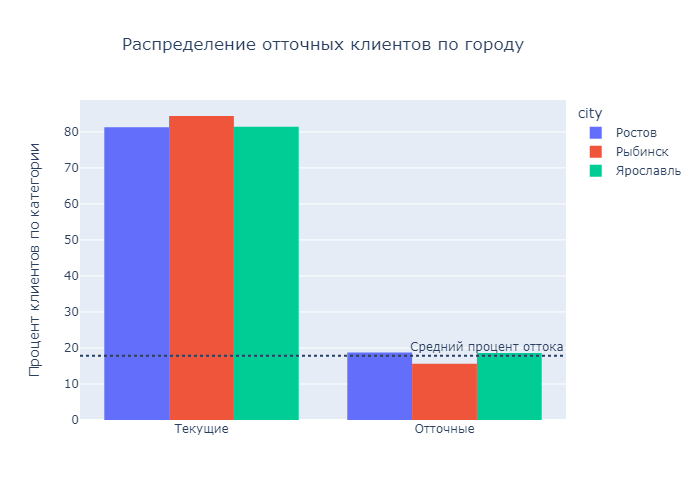

In [78]:
churn_city = df.groupby(['city', 'churn']).agg({'user_id':'count'}).reset_index()

fig = px.histogram(churn_city, x='churn', y='user_id', color='city',
                   barmode='group', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                    title='Распределение отточных клиентов по городу').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='', yaxis_title='Процент клиентов по категории')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.add_hline(y=17.82, line_dash="dot", # добавляем линию процента оттока по категории
              annotation_text="Средний процент оттока", 
              annotation_position="top right")
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси 
fig.show(renderer='png')

В Ростове и Ярославле почти одинаковый процент оттока (около 18%), а в Рыбинске отток немного ниже - 15%.

#### По возрасту

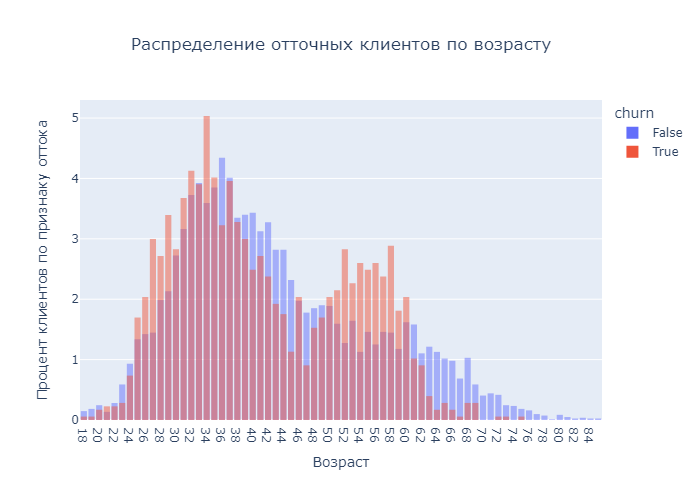

In [79]:
churn_age = df.groupby(['age', 'churn']).agg({'user_id':'count'}).reset_index() 
fig = px.histogram(churn_age, x='age', y='user_id', color='churn',
                   barmode='overlay', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Распределение отточных клиентов по возрасту').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Возраст', yaxis_title='Процент клиентов по признаку оттока')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_xaxes(type='category') # регулируем отметки на оси х



fig.show(renderer='png')

In [80]:
df.groupby('churn').agg({'age':['median', 'mean']})

age     
      median mean
churn            
False   40.0 43.0
True    39.0 41.5

Распределение отточных клиентов немного смещено влево относительно текущих, то есть отточные клиенты в среднем моложе, хотя и незначительно. На графике выделяются две возрастные группы, склонные к оттоку: 25-45 лет и 46-62.

#### По полу

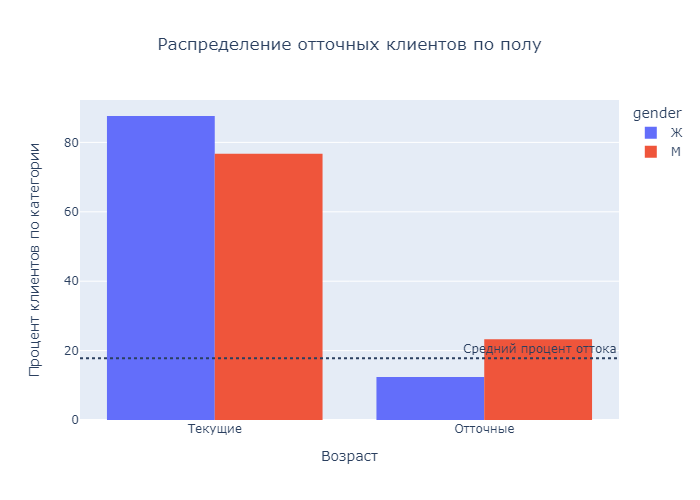

In [81]:
churn_gender = df.groupby(['gender', 'churn']).agg({'user_id':'count'}).reset_index()

fig = px.histogram(churn_gender, x='churn', y='user_id', color='gender',
                   barmode='group', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                    title='Распределение отточных клиентов по полу').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='Возраст', yaxis_title='Процент клиентов по категории')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.add_hline(y=17.82, line_dash="dot", # добавляем линию процента оттока по категории
              annotation_text="Средний процент оттока", 
              annotation_position="top right")
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси 
fig.show(renderer='png')

Среди мужчин отток выше почти в два раза, чем среди женщин (23% и 12% соответственно).

#### По скорингу

In [82]:
print('Минимальный балл скоринга среди клиентов:', df['score'].min())

Минимальный балл скоринга среди клиентов: 642


Разделим скоринг клиентов по категориям. Так как минимальный балл среди клиентов 642, будем использовать следующую классификацию (источник https://myrouble.ru/skoring/) :  
- 951-999 очень хороший (4)
- 896-950 хороший (3)
- 766-895 средний (2)
- 596-765 плохой (1)
- 1-595 очень плохой (0)

In [83]:
# напишем функцию для распределения скоринга по категориям
def f(row):
    if row['score'] <=  595:
        val = '0'
    elif 596 <= row['score'] <= 765:
        val = '1'
    elif 766 <= row['score'] <= 895:
        val = '2'
    elif 896 <= row['score'] <= 950:
        val = '3'     
    else :
        val = '4'
    return val

# создаем новую колонку с категорией на основе функции
df['score_category'] = df.apply (f, axis=1)

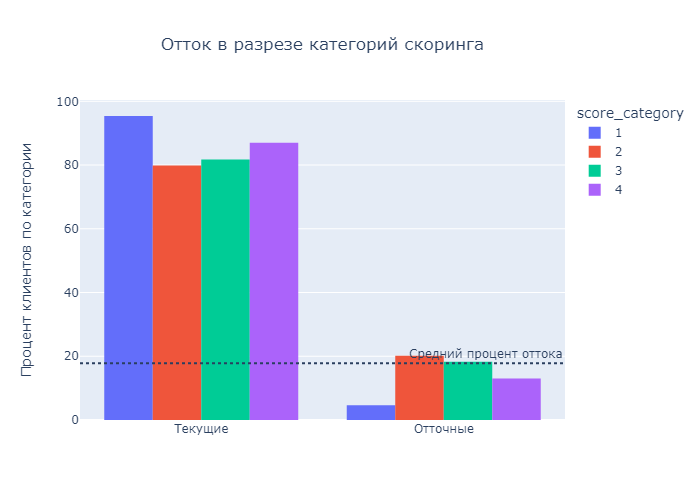

In [84]:
churn_score = df.groupby(['score_category', 'churn']).agg({'user_id':'count'}).reset_index()
fig = px.histogram(churn_score, x='churn', y='user_id', color='score_category',
                   barmode='group', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                    title='Отток в разрезе категорий скоринга').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='', yaxis_title='Процент клиентов по категории')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.add_hline(y=17.82, line_dash="dot", # добавляем линию процента оттока по категории
              annotation_text="Средний процент оттока", 
              annotation_position="top right")
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси 
fig.show(renderer='png')

Самый низкий процент оттока среди клиентов с плохими баллами скоринга (категория 1): из этой категории уходят всего 4%. Самый высокий отток среди клиентов со средним скорингом: уходит каждый пятый (20%).

#### По баллам собственности

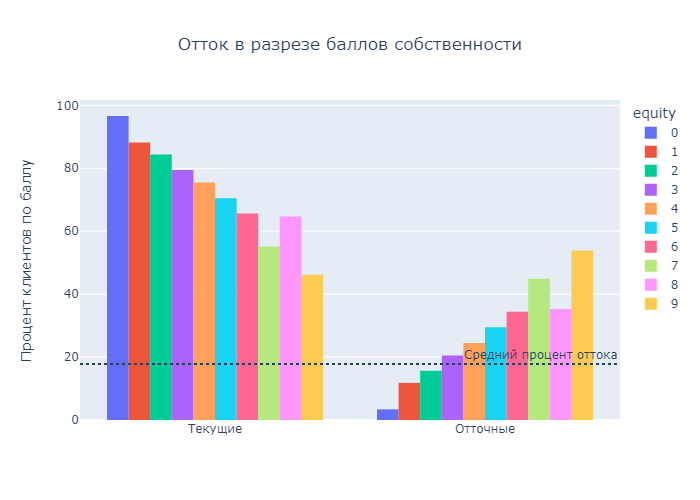

In [85]:
churn_equity = df.groupby(['equity','churn']).agg({'user_id':'count'}).reset_index()
fig = px.histogram(churn_equity, x='churn', y='user_id', color='equity',
                   barmode='group', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                    title='Отток в разрезе баллов собственности').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='', yaxis_title='Процент клиентов по баллу')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.add_hline(y=17.82, line_dash="dot", # добавляем линию процента оттока по категории
              annotation_text="Средний процент оттока", 
              annotation_position="top right")
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси 
fig.show(renderer='png')

Среди клиентов с 0 баллов собственности отток составляет всего 3%. В целом, чем выше балл собственности, тем больше отток среди группы. Среди клиентов с 9 баллами уходят больше половины (53,8%).

#### По количеству продуктов

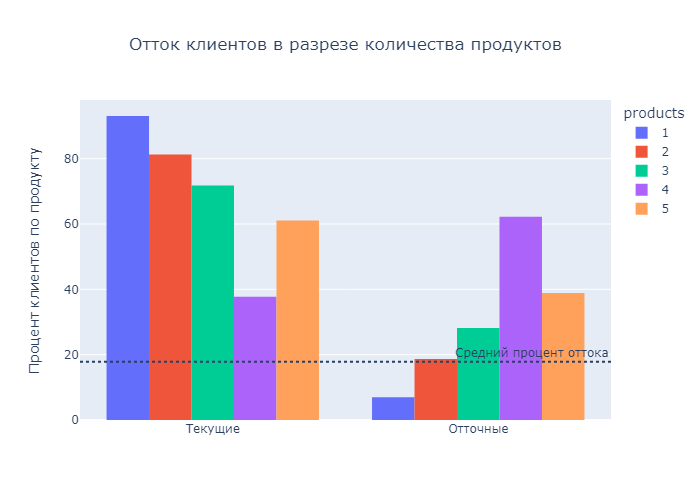

In [86]:
churn_products = df.groupby(['products', 'churn']).agg({'user_id':'count'}).reset_index()
churn_products=churn_products.query('products>0')
fig = px.histogram(churn_products, x='churn', y='user_id', color='products',
                   barmode='group', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                    title='Отток клиентов в разрезе количества продуктов').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='', yaxis_title='Процент клиентов по продукту')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси 
fig.add_hline(y=17.82, line_dash="dot", # добавляем линию процента оттока по категории
              annotation_text="Средний процент оттока", 
              annotation_position="top right")
fig.show(renderer='png')

Самая "провальная" категория - клиенты с 4 продуктами: из них остается только 38%, а 62% уходят. Самый маленький отток - среди пользователей с одним продуктом, всего 6,9%.

#### По наличию кредитной карты

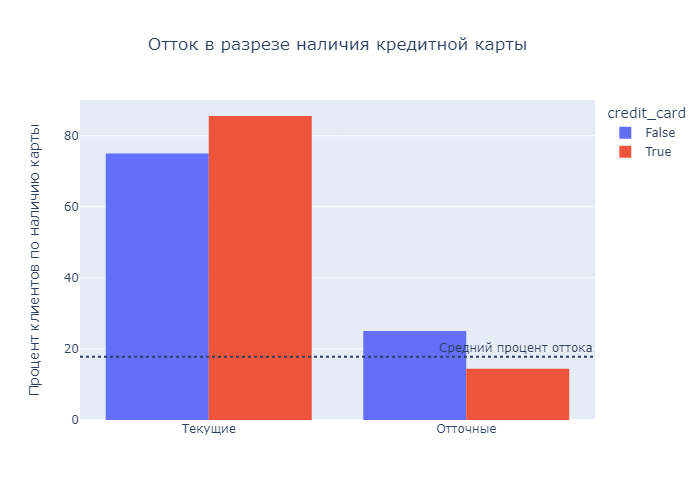

In [87]:
churn_credit_card = df.groupby(['credit_card', 'churn']).agg({'user_id':'count'}).reset_index()

fig = px.histogram(churn_credit_card, x='churn', y='user_id', color='credit_card',
                   barmode='group', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                    title='Отток в разрезе наличия кредитной карты').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='', yaxis_title='Процент клиентов по наличию карты')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.add_hline(y=17.82, line_dash="dot", # добавляем линию процента оттока по категории
              annotation_text="Средний процент оттока", 
              annotation_position="top right")
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси 
fig.show(renderer='png')

Отток гораздо выше среди клиентов, у которых нет кредитной карты: он составляет 25%. Среди клиентов, обладающих картой, отток 14%.

#### По активности

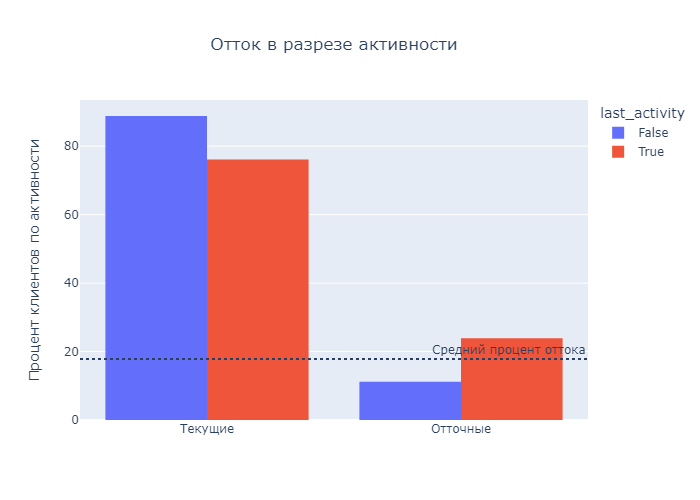

In [88]:
churn_last_activity = df.groupby(['last_activity', 'churn']).agg({'user_id':'count'}).reset_index()

fig = px.histogram(churn_last_activity, x='churn', y='user_id', color='last_activity',
                   barmode='group', 
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                    title='Отток в разрезе активности').update_xaxes(categoryorder='trace')

fig.update_layout(xaxis_title='', yaxis_title='Процент клиентов по активности')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.add_hline(y=17.82, line_dash="dot", # добавляем линию процента оттока по категории
              annotation_text="Средний процент оттока", 
              annotation_position="top right")
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси 
fig.show(renderer='png')

Около 24% клиентов, недавно проявлявших активность, уходят. Возможно, это люди, погасившие кредит и больше не нуждающиеся в услугах банка. Среди неактивных клиентов отток ниже - 11%.

#### По балансу

Посмотрим на медианный баланс текущих и отточных массовых и премиум-клиентов.

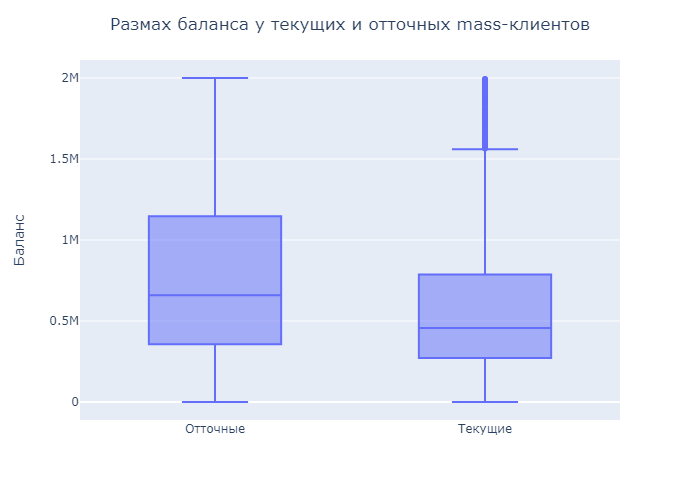

In [89]:
# массовые
fig = px.box(mass_clients, x="churn", y="balance")
fig.update_layout(title='Размах баланса у текущих и отточных mass-клиентов') #меняем заголовок 
fig.update_layout(xaxis_title='', yaxis_title='Баланс')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси
fig.show(renderer='png')

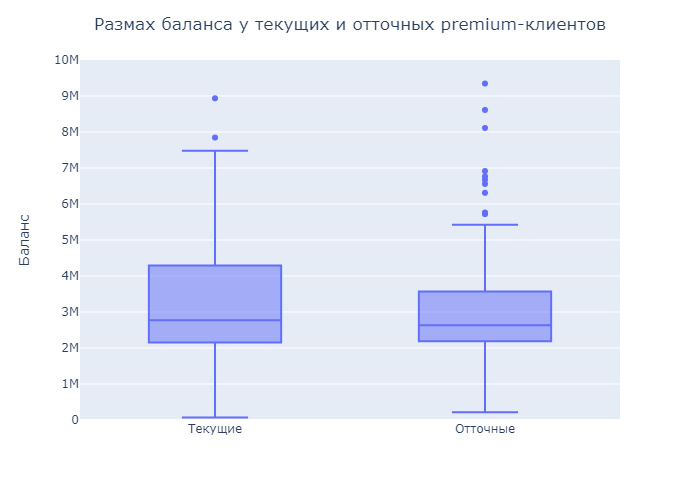

In [90]:
# премиум 
fig = px.box(premium_clients, x="churn", y="balance")
fig.update_layout(title='Размах баланса у текущих и отточных premium-клиентов') #меняем заголовок 
fig.update_layout(xaxis_title='', yaxis_title='Баланс')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси
fig.update_yaxes(range=[0,10000000]) #ограничиваем ось
fig.show(renderer='png')

В категории mass у отточных клиентов медианный баланс выше, чем у текущих: 658 тыс. против 457 тыс. В категории premium медианный баланс почти одинаковый: 2,7 млн. у текущих и 2,6 млн. у отточных.

#### По доходу

Посмотрим на медианный доход текущих и отточных массовых и премиум-клиентов.

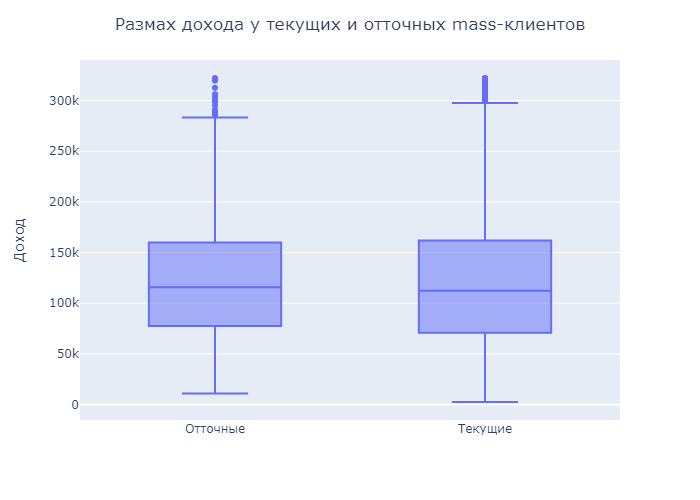

In [91]:
# массовые
fig = px.box(mass_clients, x="churn", y="est_salary")
fig.update_layout(title='Размах дохода у текущих и отточных mass-клиентов') #меняем заголовок 
fig.update_layout(xaxis_title='', yaxis_title='Доход')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси
fig.show(renderer='png')

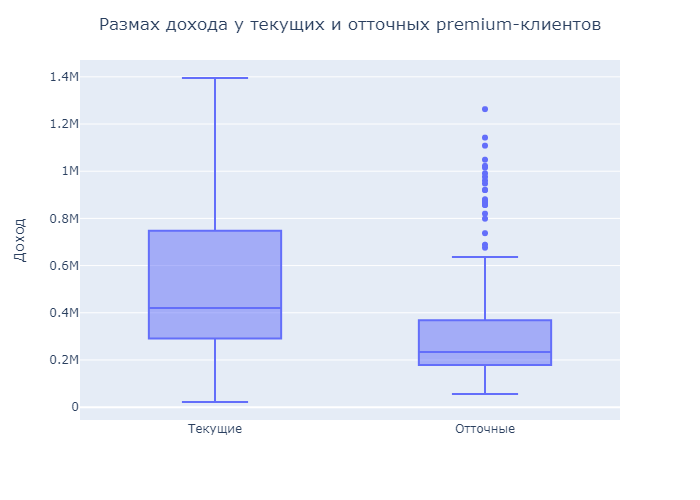

In [92]:
# премиум 
fig = px.box(premium_clients, x="churn", y="est_salary")
fig.update_layout(title='Размах дохода у текущих и отточных premium-клиентов') #меняем заголовок 
fig.update_layout(xaxis_title='', yaxis_title='Доход')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(xaxis = dict(tickmode = 'array',
                               tickvals = [False, True],ticktext = ['Текущие', 'Отточные'])) #изменяем подписи на оси
fig.show(renderer='png')

У текущих и отточных mass-клиентов почти одинаковый медианный доход (112 тыс. и 115 тыс. соответственно). А вот у текущих premium-клиентов медианный доход выше, чем у отточных (420 тыс. против 233 тыс.)

### Какие факторы больше всего влияют на отток? Построить матрицу корреляции.

####  Для массовых клиентов

In [93]:
# копируем датасет с массовыми клиентами и удаляем ненужные столбцы
mass_clients_corr = mass_clients.drop(columns=['user_id','client_category']) 
# делаем унитарное кодирование для пола и города и удаляем эти столбцы
mass_clients_corr=pd.get_dummies(mass_clients_corr, columns=["city", "gender"], prefix=["city", "gender"], drop_first= False)

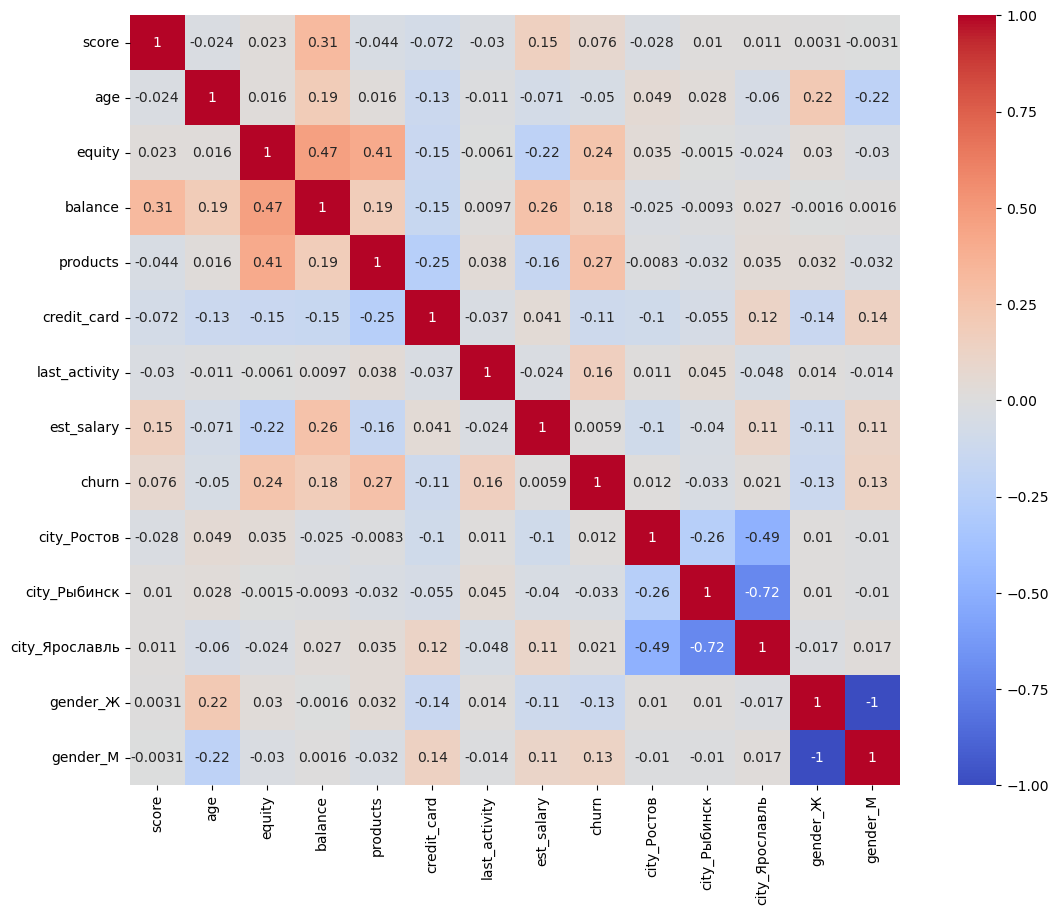

In [94]:
# строим матрицу корреляции
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(mass_clients_corr.corr(), annot = True, square=True, fmt='.2g', vmin=-1, vmax=1, center= 0,  cmap= 'coolwarm')
plt.show();

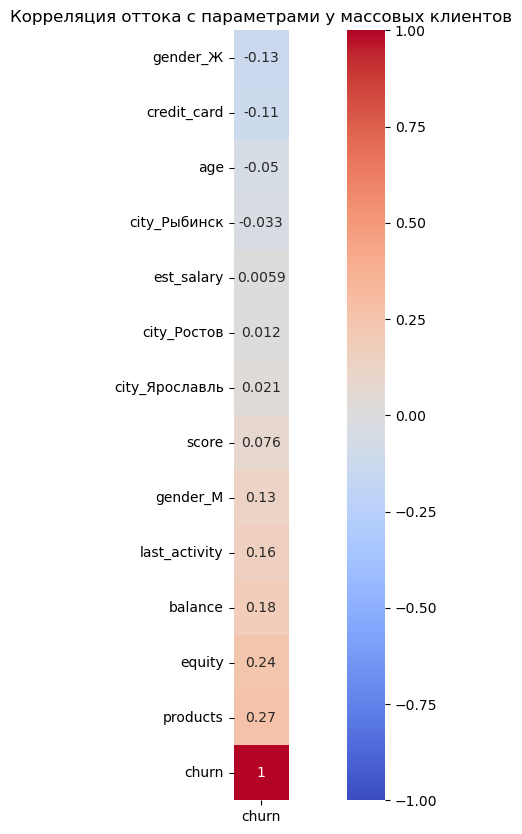

In [95]:
# выделяем столбец с оттоком
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(mass_clients_corr.corr().loc[:, ['churn']].sort_values(by='churn'), annot = True, square=True, fmt='.2g', vmin=-1, vmax=1, center= 0,  cmap= 'coolwarm').set(title='Корреляция оттока с параметрами у массовых клиентов')
plt.show();

У массовых клиентов есть слабая корреляция между оттоком и количеством продуктов (0,27), баллами собственности (0,24).

####  Для премиум клиентов

In [96]:
# копируем датасет с массовыми клиентами и удаляем ненужные столбцы
premium_clients_corr = premium_clients.drop(columns=['user_id','client_category']) 
# делаем унитарное кодирование для пола и города и удаляем эти столбцы
premium_clients_corr=pd.get_dummies(premium_clients_corr, columns=["city", "gender"], prefix=["city", "gender"], drop_first= False)
premium_clients_corr.head()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
18,876,40,5,"2,307,947.4",2,False,False,"287,010.6",False,0,0,1,0,1
30,946,47,0,NaN,2,True,True,"660,015.8",False,0,0,1,1,0
44,935,41,5,"3,781,118.2",2,True,False,"761,349.2",False,0,0,1,0,1
59,930,36,0,NaN,2,True,False,"359,081.7",False,0,0,1,1,0
63,948,34,5,"3,134,788.7",2,False,False,"199,705.3",False,0,0,1,1,0


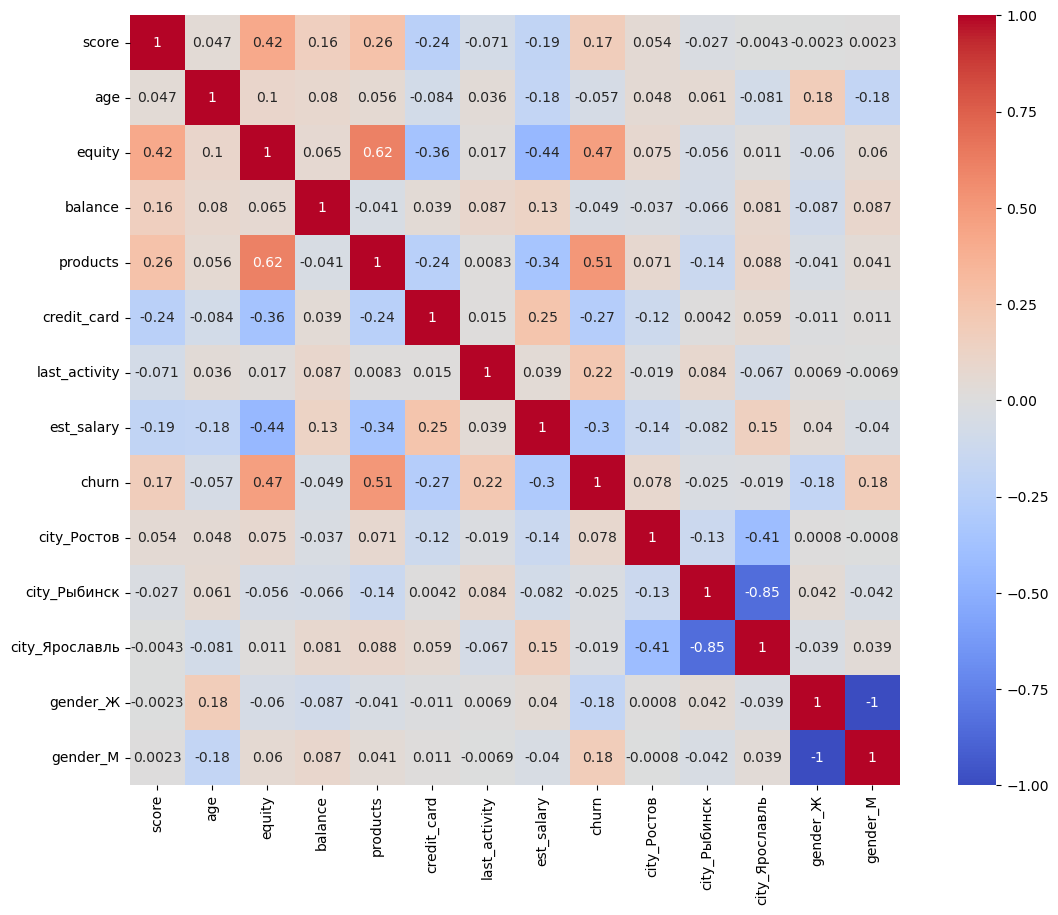

In [97]:
# строим матрицу корреляции
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(premium_clients_corr.corr(), annot = True, square=True, fmt='.2g', vmin=-1, vmax=1, center= 0,  cmap= 'coolwarm')
plt.show();

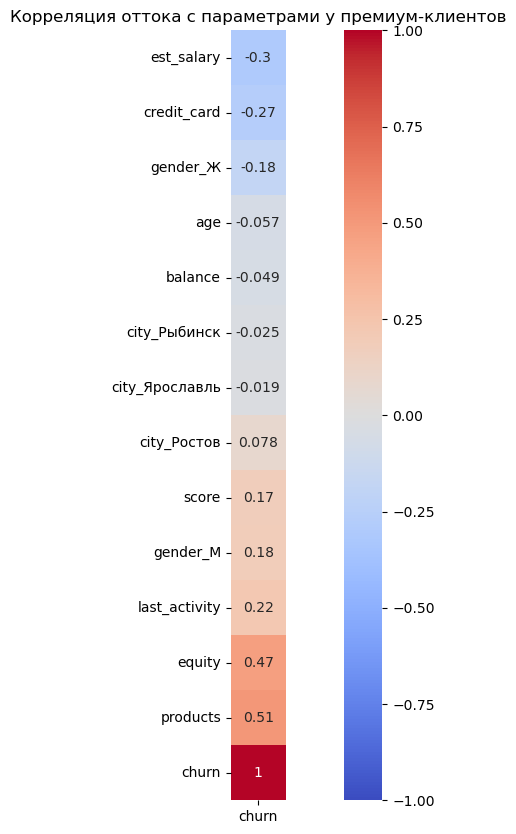

In [98]:
# выделяем столбец с оттоком
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(premium_clients_corr.corr().loc[:, ['churn']].sort_values(by='churn'), annot = True, square=True, fmt='.2g', vmin=-1, vmax=1, center= 0,  cmap= 'coolwarm').set(title='Корреляция оттока с параметрами у премиум-клиентов')
plt.show();

У премиум-клиентов есть средняя прямая корреляция между оттоком и количеством продуктов (0,51), а также баллами собственности (0,47):чем выше эти показатели, тем больше отток. Также наблюдается слабая обратная корреляция с доходом (-0,3), т.е. чем ниже доход, тем больше отток; и с наличием кредитной карты (-0,27).

### Выводы по оттоку

Процент оттока не сильно различается по городам, 18% в Ярославле и Ростове, немного ниже в Рыбинске -15%.  
Возрастные группы отточных клиентов: 25-45 лет и 46-62.  
Среди мужчин отток выше почти в два раза, чем среди женщин (23% и 12% соответственно).  
Среди клиентов со скорингом до 766 баллов самый низкий процент оттока: 4%.  
Чем выше балл собственности, тем больше отток среди группы: среди клиентов с 9 баллами уходят больше половины (53,8%).  
Почти такая же ситуация с количеством продуктов: 62% клиентов с 4 продуктами уходят.  
Клиенты, у которых есть кредитная карта, уходят реже: 14% против 25% клиентов без карты.  
Почти четверть (24%) клиентов, недавно проявлявших активность, уходят. У неактивных отток 11%.  
В категории mass у отточных клиентов медианный баланс выше, чем у текущих: 658 тыс. против 457 тыс. В категории premium медианный баланс почти одинаковый: 2,7 млн. у текущих и 2,6 млн. у отточных.  
У текущих и отточных mass-клиентов почти одинаковый медианный доход (112 тыс. и 115 тыс. соответственно). А вот у текущих premium-клиентов медианный доход выше, чем у отточных (420 тыс. против 233 тыс.)  

У премиум-клиентов есть средняя прямая корреляция между оттоком и количеством продуктов (0,51), а также баллами собственности (0,47):чем выше эти показатели, тем больше отток. Также наблюдается слабая обратная корреляция с доходом (-0,3), т.е. чем ниже доход, тем больше отток.
У массовых клиентов - слабая корреляция между оттоком и количеством продуктов (0,27), баллами собственности (0,24).

Таким образом, мы можем составить собирательный портрет типичного уклиента, склонного к уходу.

В категории mass:
- мужчина 25-45 лет
- средние баллы скоринга (766-895)
- 4-6 баллов собственности
- использующий 2-3 продукта банка
- нет кредитной карты
- недавно проявлял активность
- баланс около 658 тыс.
- доход около 115 тыс.

И в категории premium:
- мужчина 46-62 лет
- высокие баллы скоринга (от 895)
- 7-9 баллов собственности
- использующий 4 продукта банка
- нет кредитной карты
- недавно проявлял активность
- баланс около 2,6 млн.
- доход около 233 тыс.

## Проверка гипотез

Проверим две гипотезы.   
Гипотеза 1: возраст клиентов, которые пользуются двумя продуктами банка, отличается от возраста тех, кто пользуются одним.  
Гипотеза 2: доля оттока среди пользователей, у которых есть кредитная карта, отличается от тех, у кого нет карты.

### Гипотеза 1

Нулевая гипотеза: возраст клиентов, пользующихся одним продуктом, равен возрасту клиентов, пользующихся двумя продуктами.  
Альтернативная гипотеза: возраст клиентов, пользующихся одним продуктом, отличается от клиентов, пользующихся двумя продуктами.  

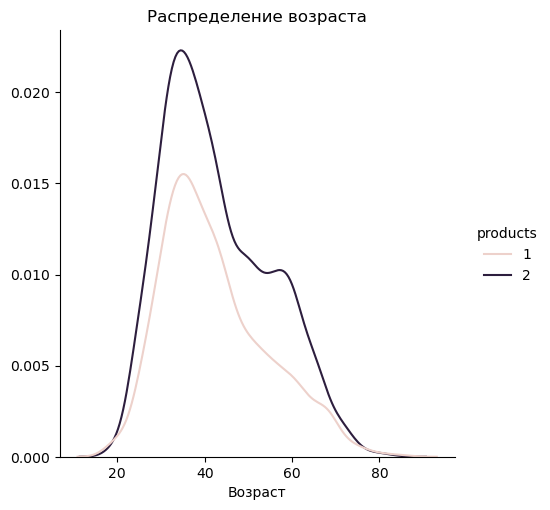

In [99]:
# проверям распределение на нормальность 
hyp_one=df.query('1 <= products <=2')
ax = sns.displot(data=hyp_one, x='age', hue='products', kind='kde', fill=False).set(title='Распределение возраста')
ax.set(xlabel='Возраст', ylabel='')
plt.show()

In [100]:
df.groupby(['products']).agg({'user_id':'count'})

,user_id
products,
1,3318
2,5094
3,1032
4,461
5,18


Распределение не нормально. Мы сравниваем две независимые выборки, поэтому будем использовать t-критерий Стьюдента. Для t-testa генеральные совокупности не обязаны быть нормально распределены, т.к. благодаря ЦПТ, при достаточном размере выборки (больше нескольких десятков значений), выборочные средние будут распределены нормально. В нашем случае выборки состоят из нескольких тысяч значений. Именно поэтому мы не применяем тест Манна-Уитни для не нормально распределенных выборок,
так как он используется для малых выборок (n < 30).

In [101]:
#выборки для теста
one_product=df.query('products==1')
two_products=df.query('products==2')

# задаем уровень статистической значимости
alpha = 0.05 
# проводим тест
results=st.ttest_ind(one_product['age'], two_products['age'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.03130573109896502
Отвергаем нулевую гипотезу


По результатам теста мы отвергаем нулевую гипотезу. Возрасты клиентов, пользующихся одним или двумя продуктами, не равны.

### Гипотеза 2

Нулевая гипотеза: доля оттока среди пользователей, у которых есть кредитная карта, равна доле оттока тех, у кого нет карты.  
Альтернативная гипотеза: доля оттока среди пользователей, у которых есть кредитная карта, отличается от тех, у кого нет карты.

Мы проверяем гипотезу о равенстве долей, для этого используем z-тест. Он подходит для сравнения двух больших независимых выборок, как в нашем случае.

In [102]:
# создаем переменные для теста
has_card_churn = df.query('credit_card == True and churn == True')
has_card_churn=has_card_churn['user_id']
no_card_churn = df.query('credit_card == False and churn == True')
no_card_churn=no_card_churn['user_id']

#проводим тест
z_test_statistics, p_value = ztest(has_card_churn, no_card_churn, value= 0 ) 
print(z_test_statistics, p_value)
alpha=0.05
if p_value < alpha:
        print('Отвергаем нулевую гипотезу')
else:
        print('Не получилось отвергнуть нулевую гипотезу')

2.633395395816364 0.008453587103847575
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу. Между долями оттока среди пользователей, обладающих и не обладающих кредитной картой, есть статистически значимая разница.

## Сегментация пользователей

### По количеству продуктов

Разделим пользователей в группы по количеству потребляемых продуктов и посмотрим на характеристики в каждой группе.

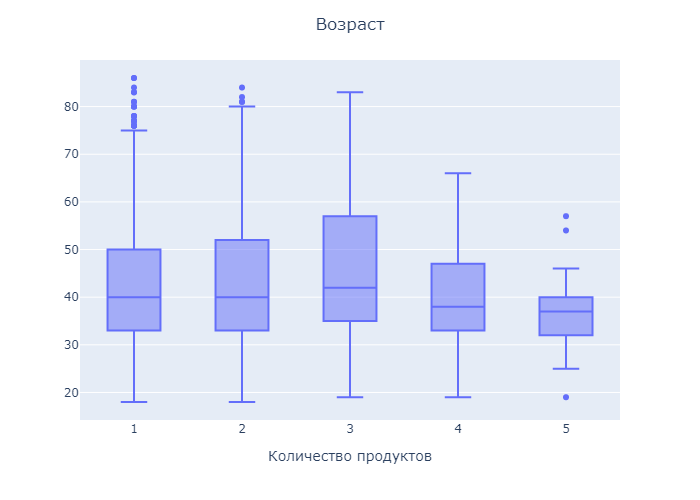

In [103]:
fig = px.box(df, x="products", y="age")
fig.update_layout(title='Возраст') #меняем заголовок 
fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка

fig.show(renderer='png')

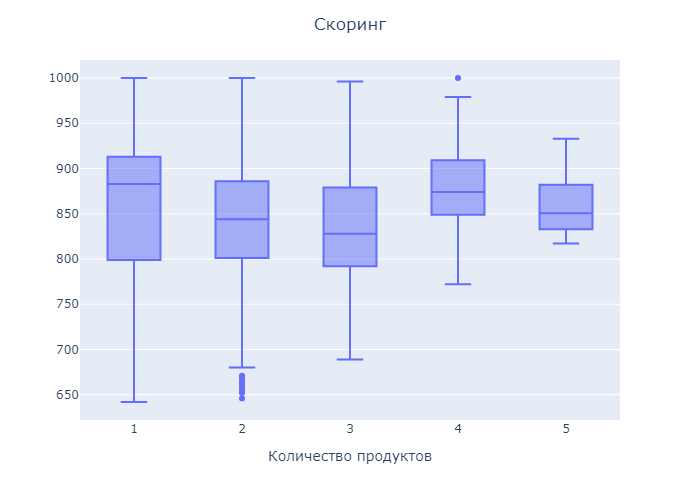

In [104]:
fig = px.box(df, x="products", y="score")
fig.update_layout(title='Скоринг') #меняем заголовок 
fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка

fig.show(renderer='png')

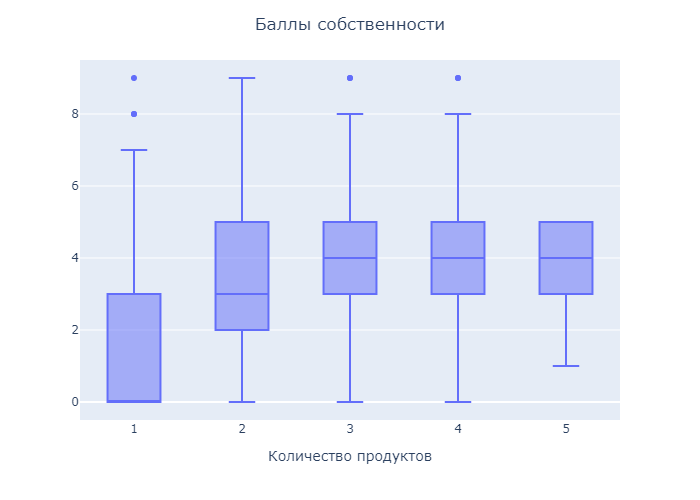

In [105]:
fig = px.box(df, x="products", y="equity")
fig.update_layout(title='Баллы собственности') #меняем заголовок 
fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка

fig.show(renderer='png')

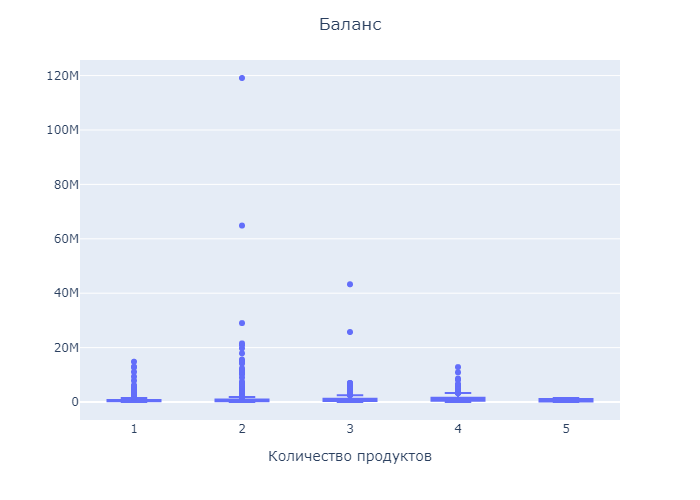

In [106]:
fig = px.box(df, x="products", y="balance")
fig.update_layout(title='Баланс') #меняем заголовок 
fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка

fig.show(renderer='png')

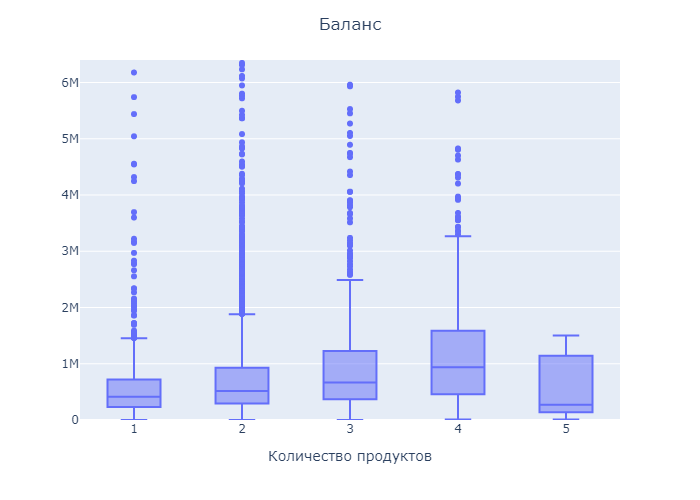

In [107]:
fig = px.box(df, x="products", y="balance")
fig.update_layout(title='Баланс') #меняем заголовок 
fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_yaxes(range=[0,6400000]) #ограничиваем ось
fig.show(renderer='png')

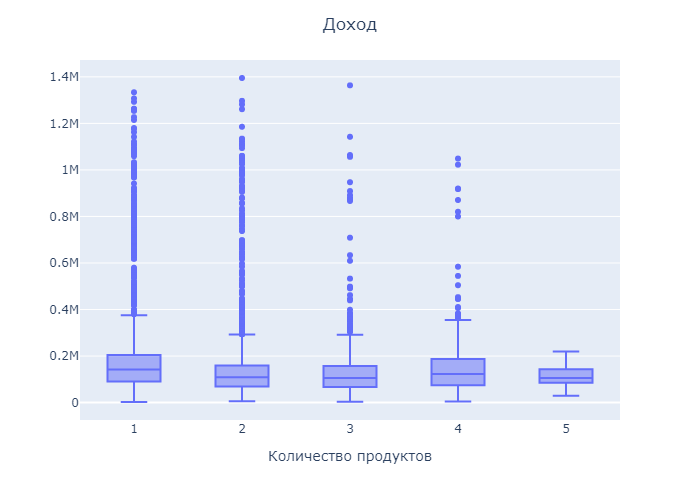

In [108]:
fig = px.box(df, x="products", y="est_salary")
fig.update_layout(title='Доход') #меняем заголовок 
fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка

fig.show(renderer='png')

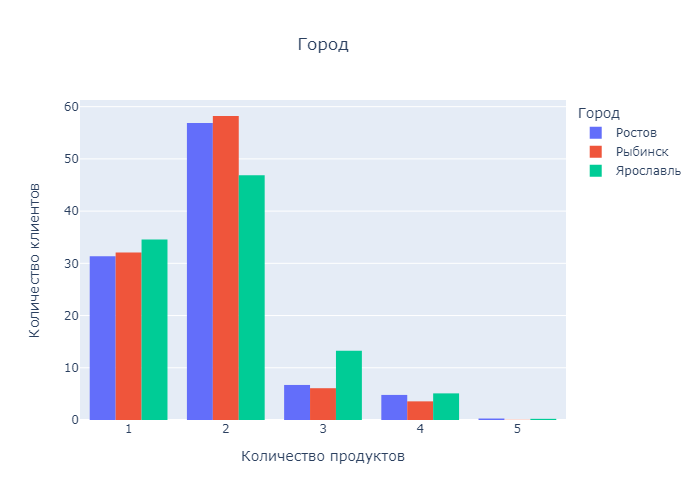

In [109]:
c = df.groupby(['products', 'city']).agg({'user_id':'count'}).reset_index()
fig = px.histogram(c, x='products', y='user_id', color='city', barmode='group',
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Город').update_xaxes(categoryorder='category ascending')

fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='Количество клиентов')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Город')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

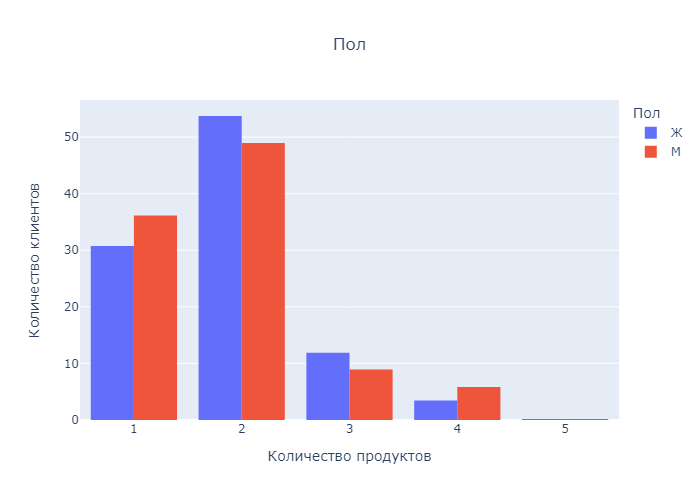

In [110]:
g=df.groupby(['products', 'gender']).agg({'user_id':'count'}).reset_index()
fig = px.histogram(g, x='products', y='user_id', color='gender', barmode='group',
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Пол').update_xaxes(categoryorder='category ascending')

fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='Количество клиентов')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Пол')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

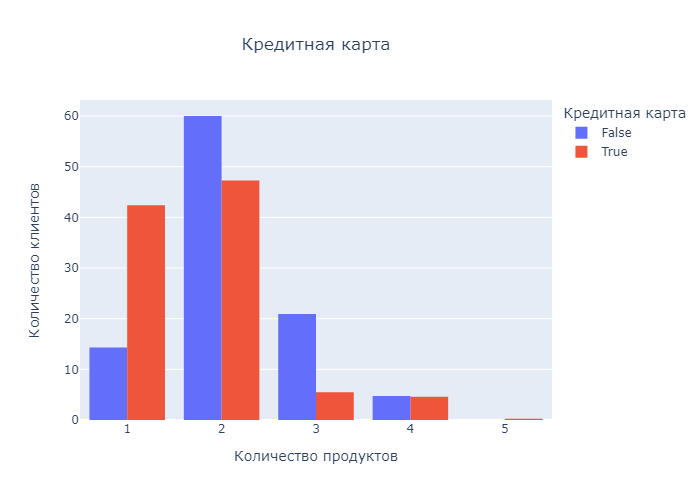

In [111]:
cc=df.groupby(['products', 'credit_card']).agg({'user_id':'count'}).reset_index()
fig = px.histogram(cc, x='products', y='user_id', color='credit_card', barmode='group',
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                  title='Кредитная карта').update_xaxes(categoryorder='category ascending')

fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='Количество клиентов')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Кредитная карта')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

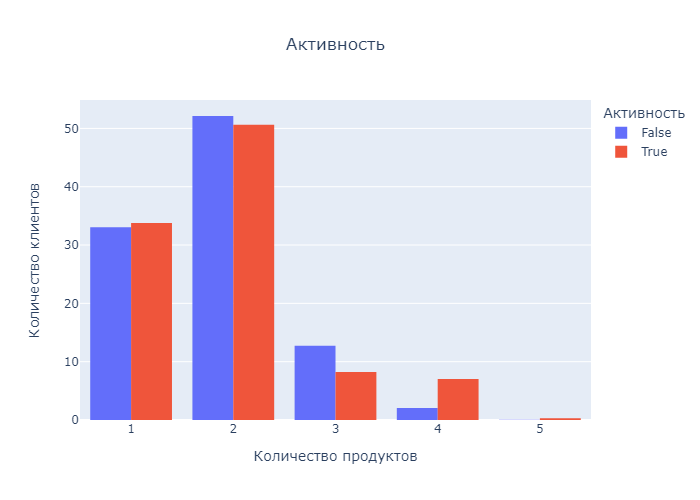

In [112]:
a=df.groupby(['products', 'last_activity']).agg({'user_id':'count'}).reset_index()
fig = px.histogram(a, x='products', y='user_id', color='last_activity', barmode='group',
                   histnorm='percent', #отображаем процентное соотношение, а не абсолютные значения
                   title='Активность').update_xaxes(categoryorder='category ascending')

fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='Количество клиентов')
fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
fig.update_layout(legend=dict(title='Активность')) #меняем заголовок легенды
fig.update_xaxes(type='category') # регулируем отметки на оси х
fig.show(renderer='png')

In [113]:
# посмотрим на количество пользователей и процент оттока для каждого сегмента
products_amt_segments = df.groupby('products').agg({'user_id':'count', 'churn':'sum'})
products_amt_segments['churn_share']=products_amt_segments['churn']/products_amt_segments['user_id']*100
products_amt_segments

,user_id,churn,churn_share
products,,,
1,3318,230,6.9
2,5094,953,18.7
3,1032,291,28.2
4,461,287,62.3
5,18,7,38.9


Выделим характерные черты для каждой группы.

Один продукт:
- всего 3318 клиентов
- **самый низкий процент оттока среди всех сегментов** - всего 6,9%
- возраст 18-75, медианный 40
- скоринг 642-1000, **самый высокий медианный скоринг** среди всех сегментов - 883 
- 0 баллов собственности
- баланс до 1,5 млн, медианный 415 тыс.
- доход до 375 тыс., но много клиентов с более высоким доходом, **самый высокий медианный доход** среди всех сегментов - 142 тыс. 
- клиенты во всех трех городах
- больше мужчин, чем женщин
- **почти у всех есть кредитная карта**
- активных клиентов больше, чем неактивных 

Два продукта:
- всего 5094 клиентов, **самый большой сегмент** по количеству клиентов
- отток 18,7%
- возраст 18-80, медианный 40
- скоринг 680-1000, медианный 844
- 0-9 баллов собственности, медиана 3
- баланс до 1,8 млн, но много клиентов с более высоким балансом, медианный 514 тыс.
- доход до 292 тыс., но много клиентов с более высоким доходом, медианный 109 тыс.
- клиенты во всех трех городах
- больше женщин
- у большинства есть кредитная карта
- активных клиентов больше, чем неактивных 

Три  продукта:
- всего 1032 клиентов
- отток 28,2%
- возраст 19-83, медианный 42            
- скоринг 689-996, медианный 828
- 0-8 баллов собственности, медиана 4
- баланс до 2,4 млн, медианный 665 тыс.
- доход до 291 тыс., медианный 105 тыс.
- клиенты в основном из Ярославля
- больше женщин
- **у большинства нет кредитной карты**
- **больше неактивных клиентов**

Четыре продукта:
- всего 461 клиент
- **самый высокий отток** - 62,3%
- возраст 19-66, медианный 38
- скоринг 772-979, медианный 874 (второй по величине)
- 0-8 баллов собственности, медиана 4
- баланс до 3,2 млн, **самый высокий медианный баланс** - 936 тыс.
- доход до 354 тыс., медианный 122 тыс. (второй по величине)
- клиенты в основном из Ярославля
- больше мужчин
- у большинства есть кредитная карта
- **активные пользователи** 

Пять продуктов:
- всего 18 клиентов, **самый маленький сегмент** по количеству клиентов
- отток 38,9%
- возраст 19-57 лет, медианный 37 
- скоринг 817-993, медианный 850
- 1-5 баллов собственности, медиана 4
- баланс до 1,5 млн, **самый низкий медианный баланс** - 270 тыс.
- доход до 219 тыс., медианный 105 тыс.
- любой город
- поровну мужчин и женщин
- **у всех есть кредитная карта**
- **активные пользователи** 




### По отличительным чертам

На основе поведения, отличительных характеристик клиентов банка мы можем выделить более точечные сегменты. Пользователи в них могут пересекаться.

#### Сегмент 1 

In [114]:
segm_one=df.query('balance>=2000000 or est_salary>= 323000')
print('Количество клиентов в сегменте:', len(segm_one))
print('Процент оттока в сегменте:', round(len(segm_one.query('churn==True'))/len(segm_one)*100, 2))

Количество клиентов в сегменте: 780
Процент оттока в сегменте: 29.23


Описание: все клиенты категории премиум.

Премиум-клиенты очень важны для банка, так как приносят ощутимый доход. В этот сегмент входит 780 клиентов, а отток составляет 29% (напомним, что средний отток всех клиентов банка обеих категорий - массовой и премиум - составляет 17.8%). 

Рекомендации для удержания:
- настроить стандарты работы с премиум-клиентами, 
- ввести предупредительные меры: регулярно проводить анализ удовлетворенности продуктами и сервиса банка
- повысить лояльность: предлагать повышенные ставки по вкладам или дополнительные льготы

#### Сегмент 2

In [115]:
segm_two=df.query('equity>=4 and score>=800')
print('Количество клиентов в сегменте:', len(segm_two))
print('Процент оттока в сегменте:', round(len(segm_two.query('churn==True'))/len(segm_two)*100, 2))

Количество клиентов в сегменте: 3408
Процент оттока в сегменте: 30.69


Описание: клиенты с высоким скорингом (больше 800) и имеющие более 4 баллов собственности.

Этот сегмент клиентов потенциально прибылен: людям с высоким скорингом и баллами собственности можно предлагать кредиты без особого риска невыплат.  
Всего в сегменте 3408 клиентов, уровень оттока довольно высокий - 30%. 

Рекомендации для удержания:
- предлагать кредитные продукты с пониженным процентом
- увеличить вовлеченность: например, ознакомить с линейкой продуктов банка и предложить заинтересовавшие услуги на выгодных клиенту условиях
- персонализировать коммуникацию: например, ввести персональные предложения или программу лояльности

#### Семент 3

In [116]:
segm_three = df.query('2<=products<=3 and credit_card == False and balance>=500000')
print('Количество клиентов в сегменте:', len(segm_three))
print('Процент оттока в сегменте:', round(len(segm_three.query('churn==True'))/len(segm_three)*100, 2))

Количество клиентов в сегменте: 1531
Процент оттока в сегменте: 35.79


Описание: клиенты с 2-3 продуктами, имеющие баланс больше 500 тыс., не обладающие кредитной картой.  

Скорее всего, это клиенты, имеющие вклады. Всего в сегменте 1531 клиент, отток составляет 35,8%.  

Рекомендации для удержания:
- предлагать вклады с повышенным процентом
- ввести реферальную программу: это повысит лояльность и вовлеченность, а также приведет новых клиентов, заинтересованных в программе вкладов.
- предлагать кредитные карты с предложениями партнеров или беспроцентным периодом: клиентов может заинтересовать выгодные им предложения, а наличие кредитной карты выгодно банку и поможет снизить отток.

#### Сегмент 4

In [117]:
segm_four = df.query('products ==1 and credit_card ==True and score > 800 and est_salary>112000')
print('Количество клиентов в сегменте:', len(segm_four))
print('Процент оттока в сегменте:', round(len(segm_four.query('churn==True'))/len(segm_four)*100, 2))

Количество клиентов в сегменте: 1340
Процент оттока в сегменте: 6.27


Описание: клиенты с одним продуктом - кредитной картой, высоким скорингом и доходом.

Всего в сегменте 1340 клиентов. Это самые лояльные пользователи, отток всего 6,2%. 

Для этих клиентов стоит направить коммуникацию на увеличение вовлеченности, использование нескольких продуктов банка. Если это клиенты, выплачивающие кредит в данный момент, необходимо предупредить их уход после выплаты. Для этого можно ввести программу бонусов (такие как, например, карты для путешественников, позволяющие копить мили, или дающие скидки у партнеров на бронирование отелей), чтобы клиент продолжал пользоваться услугами банка.

#### Сегмент 5

In [118]:
segm_five=df.query('25<=age<=62 and products>=2')
print('Количество клиентов в сегменте:', len(segm_five))
print('Процент оттока в сегменте:', round(len(segm_five.query('churn==True'))/len(segm_five)*100, 2))

Количество клиентов в сегменте: 5915
Процент оттока в сегменте: 25.14


Описание: клиенты в возрасте 25-62 лет (самый отточный диапазон возраста), использующие 2 и более продукта банка.

Это самый крупный сегмент из представленных, всего в нем 5915 клиентов. Отток составляет ровно четверть - 25%. Клиенты этого сегмента достаточно заинтересованы в банке, так как пользуются несколькими продуктами, но в то же время легко уходят, если в другом банке их привлекут более выгодные условия.

Рекомендации для удержания:
- напоминать о выгоде сотрудничества с банком: например, настроить рассылку со специальными персональными предложениями
- ориентироваться на долгосрочное взаимодействие с клиентами: например, повышенный процент на долгосрочные вклады
- повысить вовлеченность в экосистему банка: например, предлагать дебетовые карты, привязанные к основному счету, для детей.

In [119]:
# сколько клиентов банка охвачено сегментами
perc = pd.concat([segm_one, segm_two, segm_three, segm_four, segm_five], axis=0)
print('Процент клиентов, охваченных сегментами:', perc.agg({'user_id':'nunique'})/len(df)*100)

Процент клиентов, охваченных сегментами: user_id   80.7
dtype: float64


## Выводы по исследованию, рекомендации для отдела маркетинга.

Мы описали текущих и уходящих клиентов банка  «Метанпром». Для получения общих характеристик мы разделили клиентов на две группы в зависимости от баланса и дохода: массовые (mass) и премиум (premium) и обнаружили следующие черты:
- медианный возраст 40-41 год
- большая часть клиентов пользуется кредитной картой (68,6% у массовых клиентов и у 62,2% премиум);
- чуть менее половины клиентов не проявляли активность в последнее время;
- медианное количество баллов собственности: 4;
- в среднем пользуются двумя продуктами банка;
- 73% премиум и 58% массовых клиентов находятся в Ярославле, 21% премиум и 27% массовых - в Рыбинске, 6% премиум и 15% массовых - в Ростове;
- среди премиум-клиентов 61% мужчин, среди массовых - 49%;
- медианный балл скоринга у премиум - 919, у массовых - 848;
- медианный доход массовых клиентов - 100 тыс. руб., премиум - 359 тыс. руб.;
- медианный баланс массовых клиентов - 486 тыс. руб.,  премиум - 2,7 млн. руб.  

Далее мы выяснили, в каких категориях клиентов происходит отток и получили следующие результаты (далее - процент оттока по характеристикам):
- по городам: 18% в Ярославле и Ростове, 15%  в Рыбинске;
- по возрасту: в группе 25-45 лет и  в группе 46-62 года;
- по полу: 23% мужчин, 12% женщин
- по скорингу: 20% среди клиентов с 766-895 баллами, 18% среди клиентов с 896-950 баллами
- по баллам собственности: 53,8% среди клиентов с 9 баллами, 44,8% среди клиентов с 7 баллами, около 35% с 6 или 8 баллами, 29,4% с 5 баллами, 24,5% с 4 баллами, 20% с 3 баллами;
- по количеству продуктов: 62% среди клиентов с 4 продуктами, 38,8% с 5 продуктами, 28% с 3 продуктами, 18% с 2 продуктами;
- по наличию кредитной карты: 25% среди клиентов без карты, 14% среди обладающих картой;
- по активности: 24% среди активных, 11% среди неактивных;
- по балансу: медианный баланс отточных клиентов в категории mass 658 тыс., в категории premium 2,7 млн.;
- по доходу: медианный доход отточных клиентов в категории mass 115 тыс., в категории premium 233 тыс.

Мы построили матрицы корреляции признаков и обнаружили следующее:
- у массовых клиентов есть слабая корреляция между оттоком и количеством продуктов (0,27), баллами собственности (0,24).
- у премиум-клиентов есть средняя прямая корреляция между оттоком и количеством продуктов (0,51), а также баллами собственности (0,47):чем выше эти показатели, тем больше отток. Также наблюдается слабая обратная корреляция с доходом (-0,3), т.е. чем ниже доход, тем больше отток.

В ходе исследования было проверено 2 гипотезы. Гипотеза 1 подтвердилась: возраст клиентов, которые пользуются двумя продуктами банка, отличается от возраста тех, кто пользуются одним.
Гипотеза 2 также подтвердилась:  доля оттока среди пользователей, у которых есть кредитная карта, отличается от тех, у кого нет карты.

Также мы провели 2 вида сегментации: по количеству продуктов и по отличительным характеристикам клиентов. Второй вид сегментации более точечный и позволяет работать с клиентами более направленно. Отделу маркетинга были даны рекомендации по удержанию клиентов по этим сегментам.

*Сегмент 1.*  
Описание: все клиенты категории премиум

Премиум-клиенты очень важны для банка, так как приносят ощутимый доход. В этот сегмент входит 780 клиентов, а отток составляет 29% (напомним, что средний отток всех клиентов банка обеих категорий - массовой и премиум - составляет 17.8%). 

Рекомендации для удержания:

- настроить стандарты работы с премиум-клиентами,
- ввести предупредительные меры: регулярно проводить анализ удовлетворенности продуктами и сервиса банка,
- повысить лояльность: предлагать повышенные ставки по вкладам или дополнительные льготы.

*Сегмент 2.*    
Описание: клиенты с высоким скорингом (больше 800) и имеющие более 4 баллов собственности.

Этот сегмент клиентов потенциально прибылен: людям с высоким скорингом и баллами собственности можно предлагать кредиты без особого риска невыплат.  
Всего в сегменте 3408 клиентов, уровень оттока довольно высокий - 30%. 

Рекомендации для удержания:
- предлагать кредитные продукты с пониженным процентом,
- увеличить вовлеченность: например, ознакомить с линейкой продуктов банка и предложить заинтересовавшие услуги на выгодных клиенту условиях,
- персонализировать коммуникацию: например, ввести персональные предложения или программу лояльности.

*Сегмент 3.*  
Описание: клиенты с 2-3 продуктами, имеющие баланс больше 500 тыс., не обладающие кредитной картой.  

Скорее всего, это клиенты, имеющие вклады. Всего в сегменте 1531 клиента, отток составляет 35,8%.  

Рекомендации для удержания:
- предлагать вклады с повышенным процентом
- ввести реферальную программу: это повысит лояльность и вовлеченность, а также приведет новых клиентов, заинтересованных в программе вкладов.
- предлагать кредитные карты с предложениями партнеров или беспроцентным периодом: клиентов может заинтересовать выгодные им предложения, а наличие кредитной карты выгодно банку и поможет снизить отток.

*Сегмент 4.*   
Описание: клиенты с одним продуктом - кредитной картой, высоким скорингом и доходом.

Всего в сегменте 1340 клиентов. Это самые лояльные пользователи, отток всего 6,2%. 

Для этих клиентов стоит направить коммуникацию на увеличение вовлеченности, использование нескольких продуктов банка. Если это клиенты, выплачивающие кредит в данный момент, необходимо предупредить их уход после выплаты. Для этого можно ввести программу бонусов (такие как, например, карты для путешественников, позволяющие копить мили, или дающие скидки у партнеров на бронирование отелей), чтобы клиент продолжал пользоваться услугами банка.

*Сегмент 5.*  
Описание: клиенты в возрасте 25-62 лет (самый отточный диапазон возраста), использующие 2 и более продукта банка.

Это самый крупный сегмент из представленных, всего в нем 5915 клиентов. Отток составляет ровно четверть - 25%. Клиенты этого сегмента достаточно заинтересованы в банке, так как пользуются несколькими продуктами, но в то же время легко уходят, если в другом банке их привлекут более выгодные условия.

Рекомендации для удержания:
- напоминать о выгоде сотрудничества с банком: например, настроить рассылку со специальными персональными предложениями
- ориентироваться на долгосрочное взаимодействие с клиентами: например, повышенный процент на долгосрочные вклады
- повысить вовлеченность в экосистему банка: например, предлагать дебетовые карты, привязанные к основному счету, для детей.